# YouTube Trending Videos Analysis

<p>&nbsp;</p>
<img src="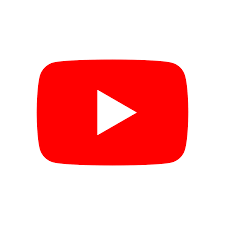" width=600>
<p>&nbsp;</p>

# YouTube Trending Videos Analysis

YouTube, the world's leading video-sharing platform, hosts a constantly updated list of **trending videos** that captivate audiences globally. This analysis harnesses the power of **Python**, aided by essential libraries such as **Pandas** and **Matplotlib**, to explore a dataset encompassing 205 days of YouTube trending videos. Each dataset entry represents the top-trending videos for a specific day, offering a rich source of insights into the world of YouTube trends. These insights can be invaluable to content creators seeking to enhance their video's popularity on the platform.

The dataset used in this analysis is drawn from Kaggle and focuses on trending videos in the United States. Access the dataset [here](https://www.kaggle.com/datasnaek/youtube-new).

## Analysis Goals

Our analysis aims to answer critical questions, including:

1. **Video Popularity:** How many views do trending videos typically receive? Is a high view count a prerequisite for a video to trend?
2. **Likes and Comments:** How do likes and comments correlate with trending status? Are there patterns among these metrics?
3. **Longest-Trending Videos:** Which videos have spent the most time on the trending list?
4. **Title Capitalization:** What percentage of trending videos feature fully-capitalized words in their titles?
5. **Title Length:** Is there a relationship between title length and a video's trending potential?
6. **Correlations:** How are attributes like views, likes, dislikes, comment counts, and title length interconnected?
7. **Title Keywords:** What are the most frequently used words in trending video titles?
8. **Top YouTube Channels:** Which YouTube channels have the most representation among trending videos?
9. **Video Categories:** Which categories dominate the trending scene?
10. **Publishing Trends:** When are trending videos typically published? Do specific days of the week or times of day influence their appearance on the trending list?

This comprehensive analysis will illuminate the dynamics of YouTube's trending section, providing valuable insights for creators and enthusiasts alike.

## Table of contents
* [Importing some packages](#import)
* [Reading the dataset](#read)
* [Getting a feel of the dataset](#feel)
* [Data cleaning](#clean)
* [Dataset collection years](#coll)
* [Describtion of numerical columns](#descn)
    * [Views histogram](#vh)
    * [Likes histogram](#lh)
    * [Comment count histogram](#ch)
* [Description on non-numerical columns](#descnn)
* [How many trending video titles contain capitalized word?](#cap)
* [Video title lengths](#len)
* [Correlation between dataset variables](#corr)
* [Most common words in video titles](#commti)
* [Which channels have the largest number of trending videos?](#chan)
* [Which video category has the largest number of trending videos?](#cat)
* [Trending videos and their publishing time](#pub)
* [How many trending videos have an error?](#err)
* [How many trending videos have their commets disabled?](#commdis)
* [How many trending videos have their ratings disabled?](#ratdis)
* [How many videos have both comments and ratings disabled?](#commratdis)
* [Conclusions](#conc)

Let's get started.

## <a name="import"></a>Importing some packages
First, we import some Python packages that will help us analyzing the data, especially `pandas` for data analysis and `matplotlib` for visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

In [2]:
# Hiding warnings for cleaner display
warnings.filterwarnings('ignore')

# Configuring some options
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# If you want interactive plots, uncomment the next line
# %matplotlib notebook

## <a name="read"></a>Reading the dataset
Then we read the dataset file which is in csv format

In [3]:
df = pd.read_csv("/content/USvideos.csv")

We set some configuration options just for improving visualization graphs; nothing crucial

In [4]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

## <a name="feel"></a>Getting a feel of the dataset
Let's get a feel of our dataset by displaying its first few rows

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374.00,57527.00,2966.00,15954.00,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783.00,97185.00,6146.00,12703.00,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.00,146033.00,5339.00,8181.00,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168.00,10172.00,666.00,2146.00,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731.00,132235.00,1989.00,17518.00,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Now, let's see some information about our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7269 entries, 0 to 7268
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   video_id                7269 non-null   object 
 1   trending_date           7269 non-null   object 
 2   title                   7269 non-null   object 
 3   channel_title           7269 non-null   object 
 4   category_id             7269 non-null   int64  
 5   publish_time            7269 non-null   object 
 6   tags                    7269 non-null   object 
 7   views                   7268 non-null   float64
 8   likes                   7268 non-null   float64
 9   dislikes                7268 non-null   float64
 10  comment_count           7268 non-null   float64
 11  thumbnail_link          7268 non-null   object 
 12  comments_disabled       7268 non-null   object 
 13  ratings_disabled        7268 non-null   object 
 14  video_error_or_removed  7268 non-null   

We can see that there are `7269` entries in the dataset. We can see also that all columns in the dataset are complete (i.e. they have `7269` non-null entries) except `description` column which has some `null` values; it only has `7136` non-null values.

## <a name="clean"></a>Data cleaning
The `description` column has some null values. These are some of the rows whose description values are null. We can see that null values are denoted by `NaN`

In [7]:
df[df["description"].apply(lambda x: pd.isna(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
42,NZFhMSgbKKM,17.14.11,Dennis Smith Jr. and LeBron James go back and ...,Ben Rohrbach,17,2017-11-13T15:11:00.000Z,[none],945.00,7.00,5.00,8.00,https://i.ytimg.com/vi/NZFhMSgbKKM/default.jpg,False,False,False,NaN
47,sbcbvuitiTc,17.14.11,Stephon Marbury and Jimmer Fredette fight in C...,NBA Highlights · YouTube,17,2017-11-10T18:23:05.000Z,"NBA|""Basketball""|""Sports""",956169.00,2017.00,2425.00,1447.00,https://i.ytimg.com/vi/sbcbvuitiTc/default.jpg,False,False,False,NaN
175,4d07RXYLsJE,17.14.11,Sphaera - demonstrating interaction,Jenny Hanell,28,2017-11-04T20:48:16.000Z,[none],1827.00,3.00,0.00,2.00,https://i.ytimg.com/vi/4d07RXYLsJE/default.jpg,False,False,False,NaN


So to do some sort of data cleaning, and to get rid of those null values, we put an empty string in place of each null value in the `description` column

In [8]:
df["description"] = df["description"].fillna(value="")

## <a name="coll"></a>Dataset collection years
Let's see in which years the dataset was collected

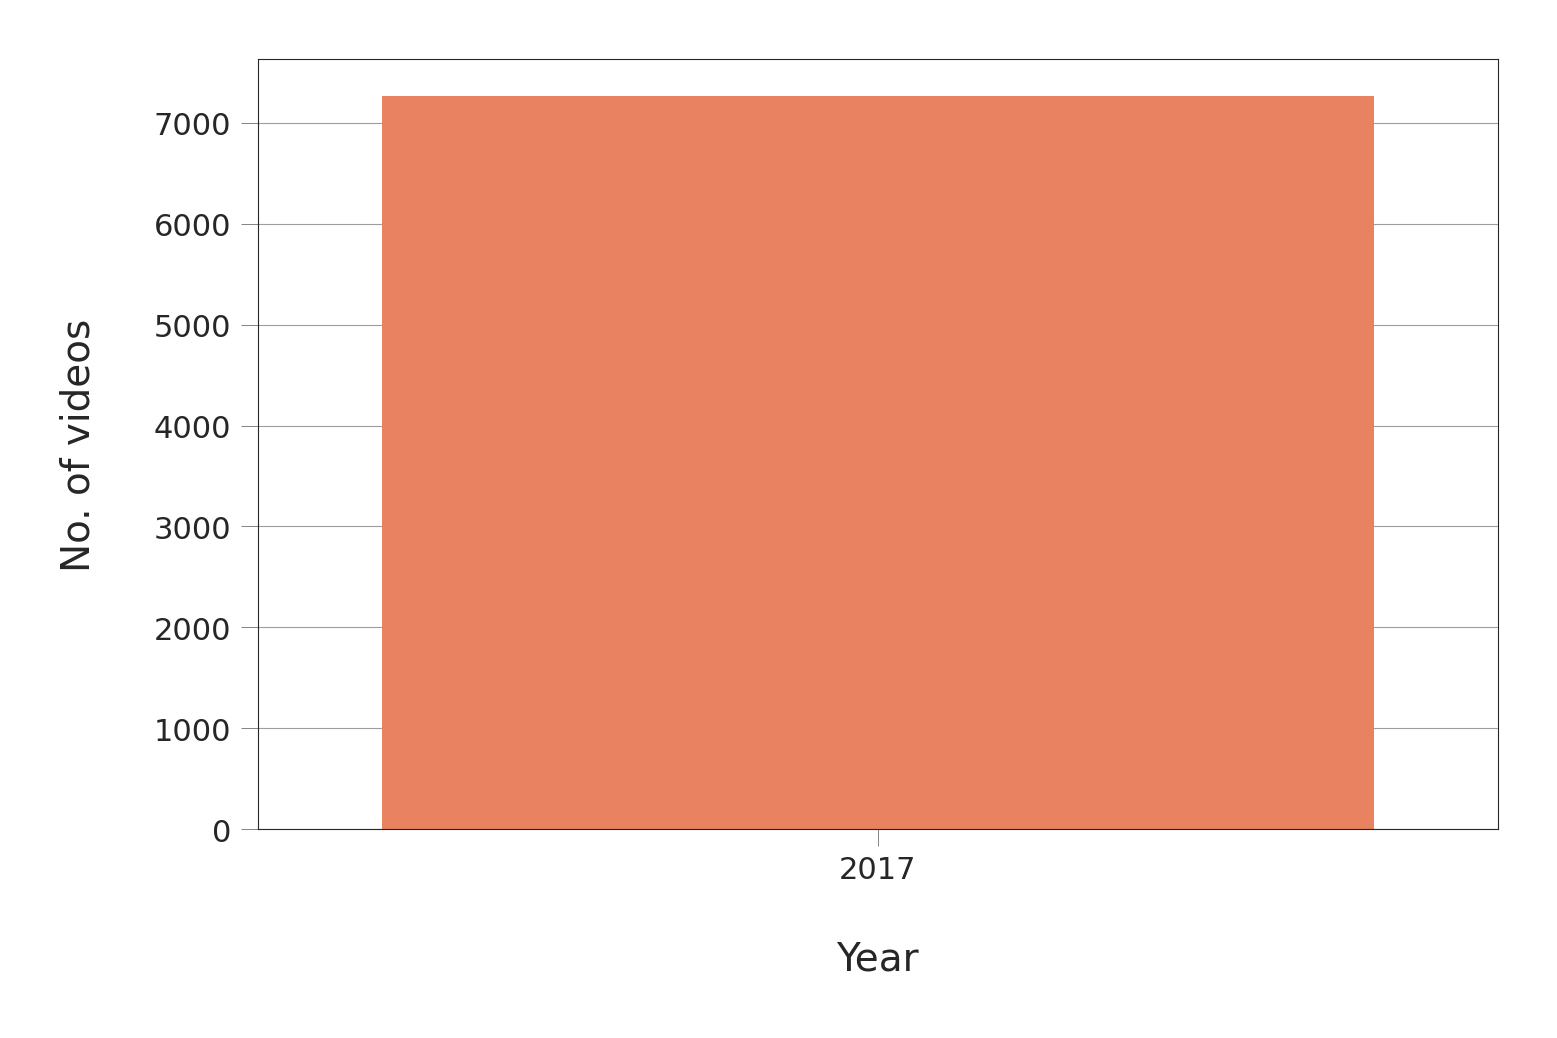

In [11]:
import matplotlib.pyplot as plt

# Set the font family to 'sans-serif'
plt.rcParams['font.family'] = 'sans-serif'

# Your existing code for creating the plot
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf,
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

# Show the plot
plt.show()

In [12]:
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)

2017   1.00
Name: trending_date, dtype: float64

We can see that the dataset was collected in 2017 and 2018 with `20%` of it in 2018 and `80%` in 2017.

In [13]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,7269.00,7268.00,7268.00,7268.00,7268.00
mean,20.07,1348339.56,49057.02,3210.70,6243.03
std,7.40,5749472.34,187042.51,44420.48,34112.30
min,1.00,687.00,0.00,0.00,0.00
25%,17.00,83413.25,2018.00,76.00,265.75
50%,24.00,301432.00,8852.50,295.50,1002.50
75%,25.00,946998.50,28644.00,1034.25,3277.00
max,29.00,149376127.00,3093544.00,1643059.00,827755.00


We note from the table above that
- The average number of views of a trending video is `1,348,340,`. The median value for the number of views is `301,432`, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number
- The average number of likes of a trending video is `49,057`, while the average number of dislikes is aproxx `3,211`.
- The Average comment count is `6,243` while the median is aproxx `295.5`

How useful are the observations above? Do they really represent the data? Let's examine more.

### <a name="vh"></a>Views histogram
let's plot a [histogram](https://www.mathsisfun.com/data/histograms.html) for the `views` column to take a look at its distribution: to see how many videos have between `10` million and `20` million views, how many videos have between `20` million and `30` million views, and so on.

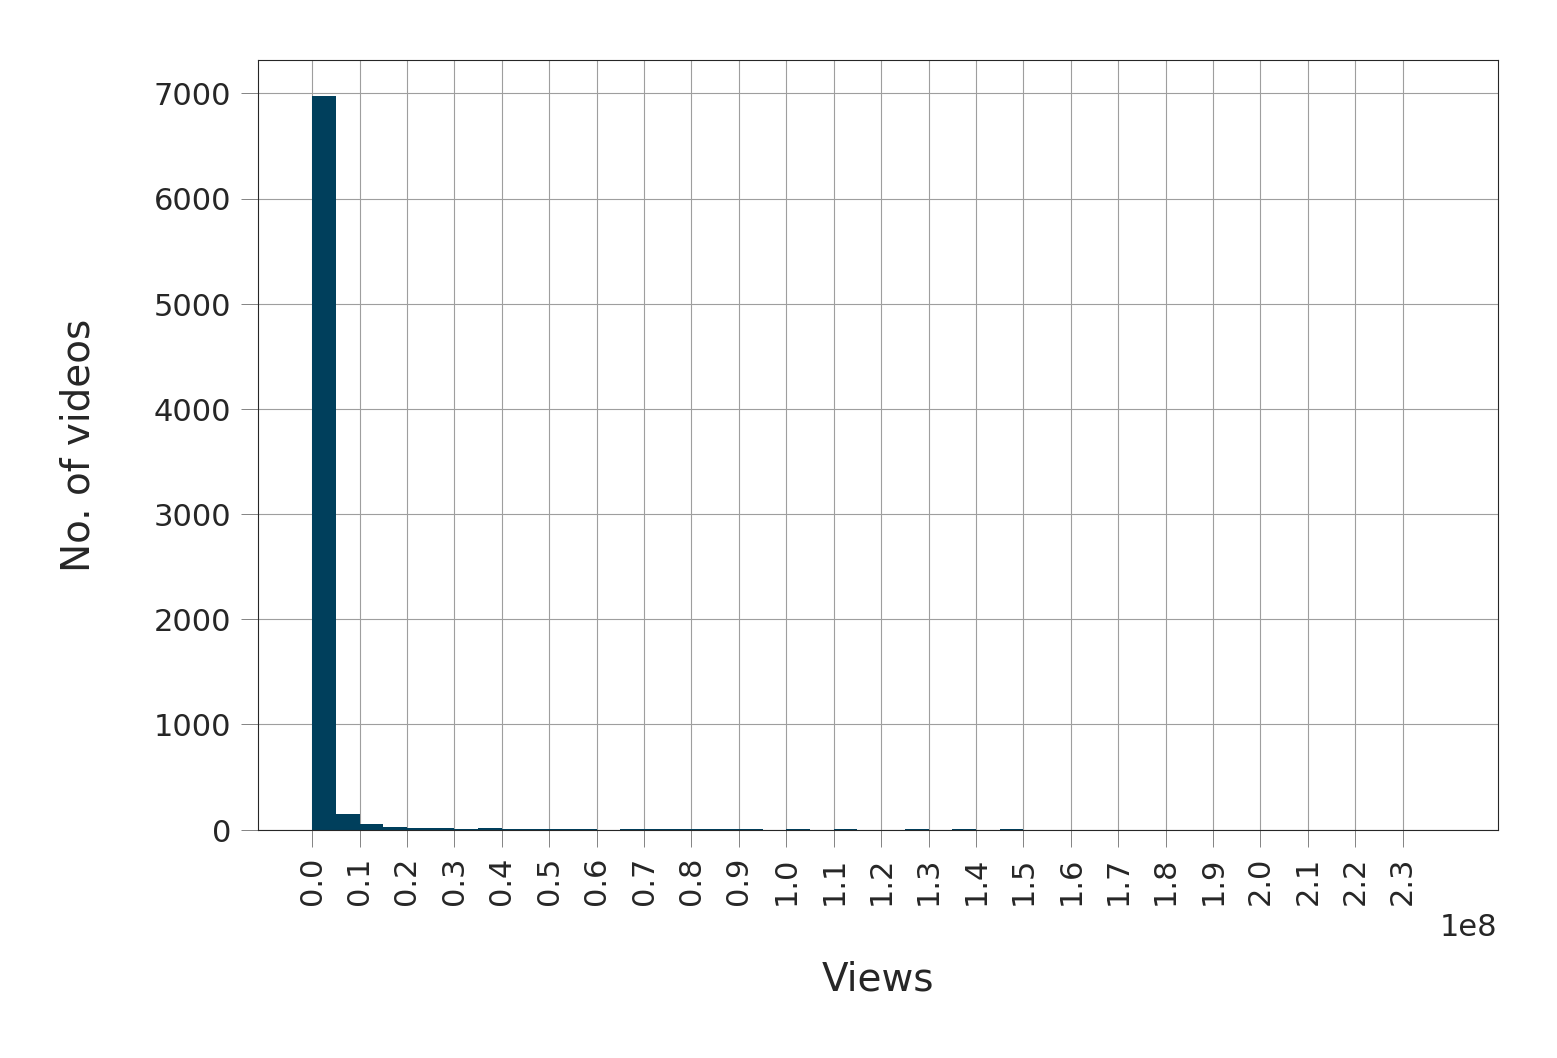

In [14]:
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4],
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

We note that the vast majority of trending videos have `5` million views or less. We get the `5` million number by calculating

\begin{align}
\frac{0.1 \times 10^8}{2} = 5 \times 10^6
\end{align}

Now let us plot the histogram just for videos with `25` million views or less to get a closer look at the distribution of the data

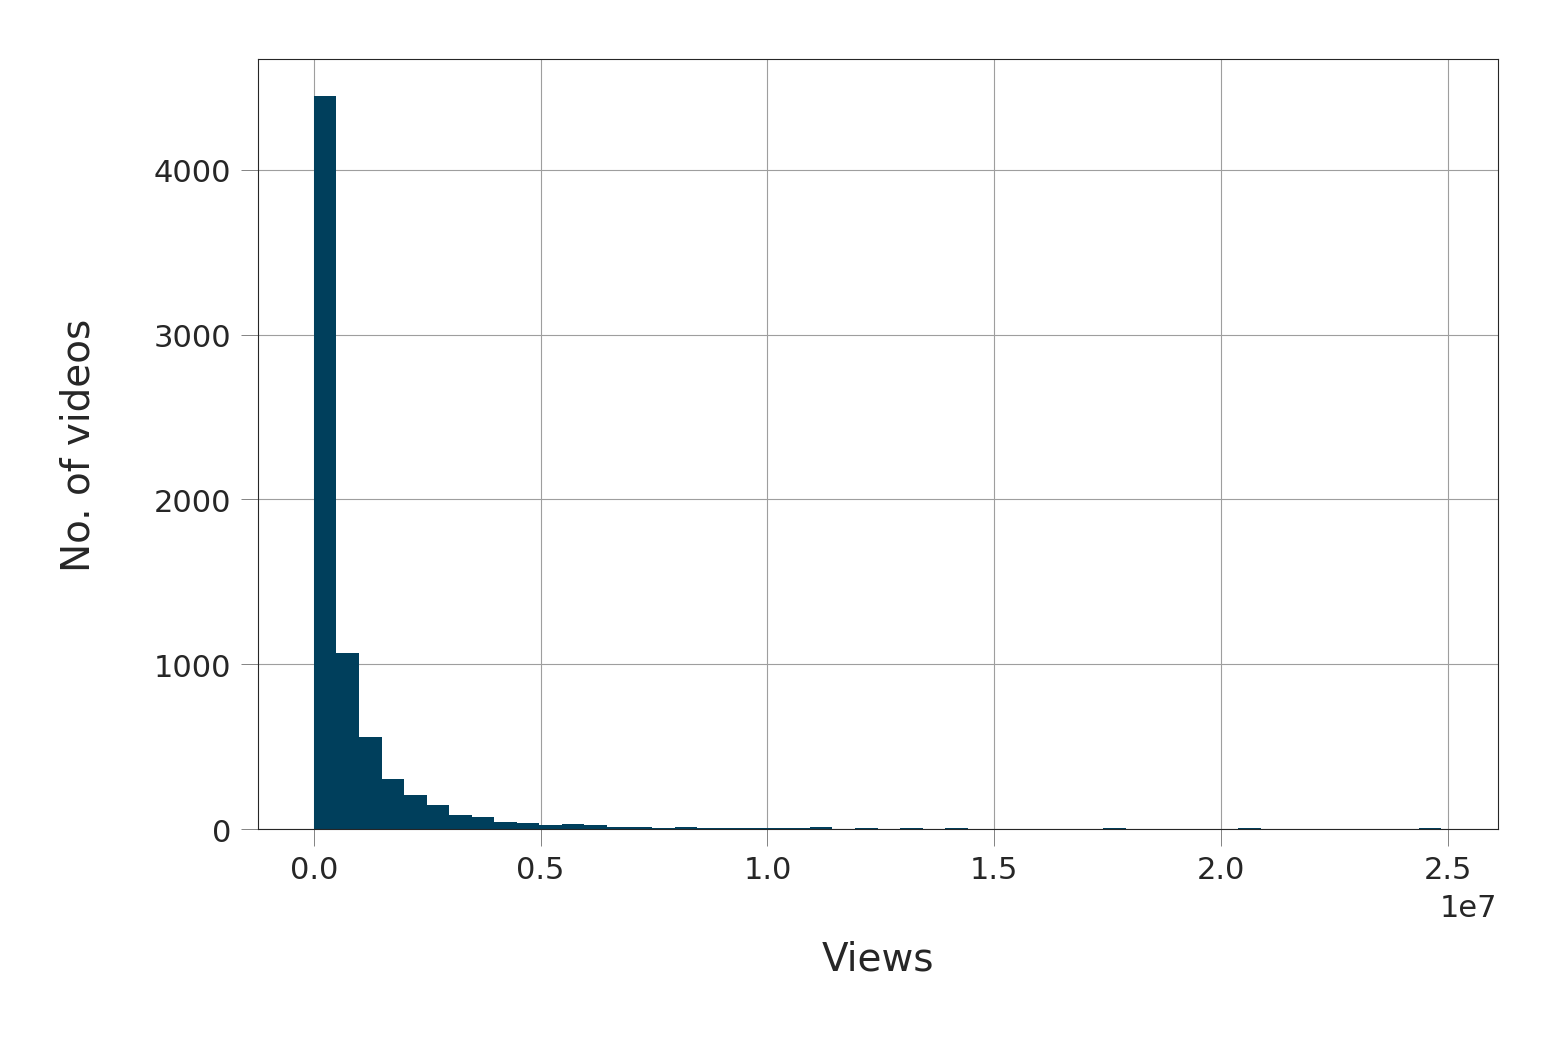

In [15]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

Now we see that the majority of trending videos have `1` million views or less. Let's see the exact percentage of videos less than `1` million views

In [16]:
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

76.04567969179968

So, it is around `76.05%`. Similarly, we can see that the percentage of videos with less than `1.5` million views is around `71%`, and that the percentage of videos with less than `5` million views is around `91%`.

### <a name="lh"></a>Likes histogram

After `views`, we plot the histogram for `likes` column

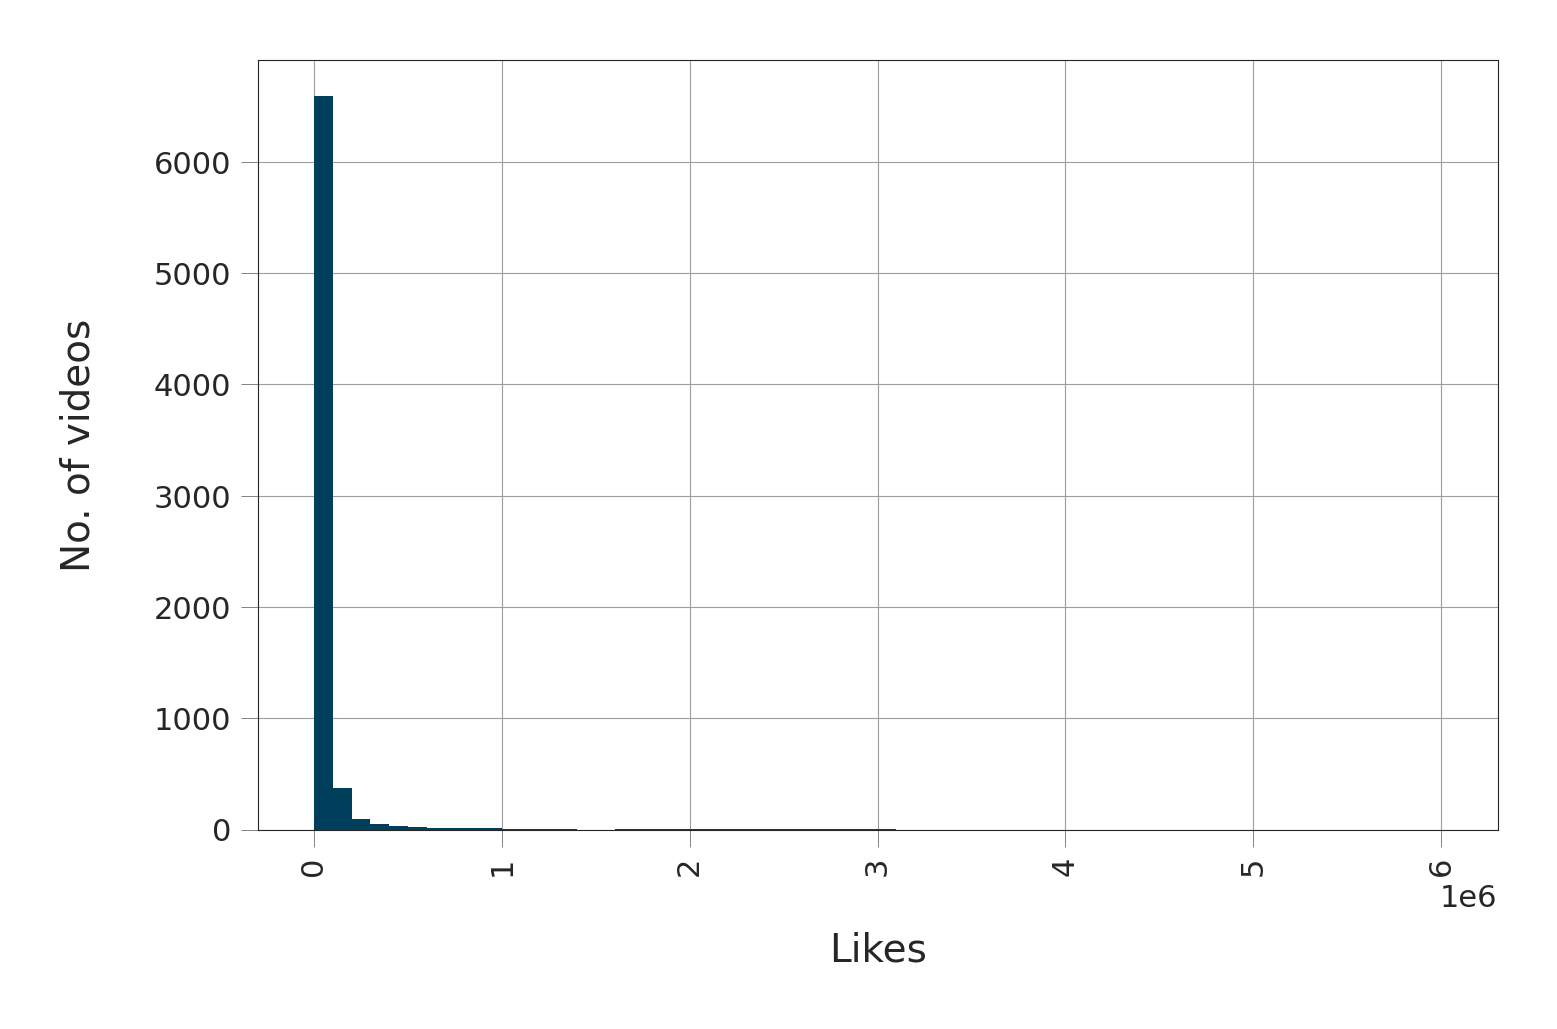

In [17]:
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1},
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

Now we can see that the majority of trending videos have `40000` likes or less with a peak for videos with `2000` likes or less.

Let's see the exact percentage of videos with less than `40000` likes

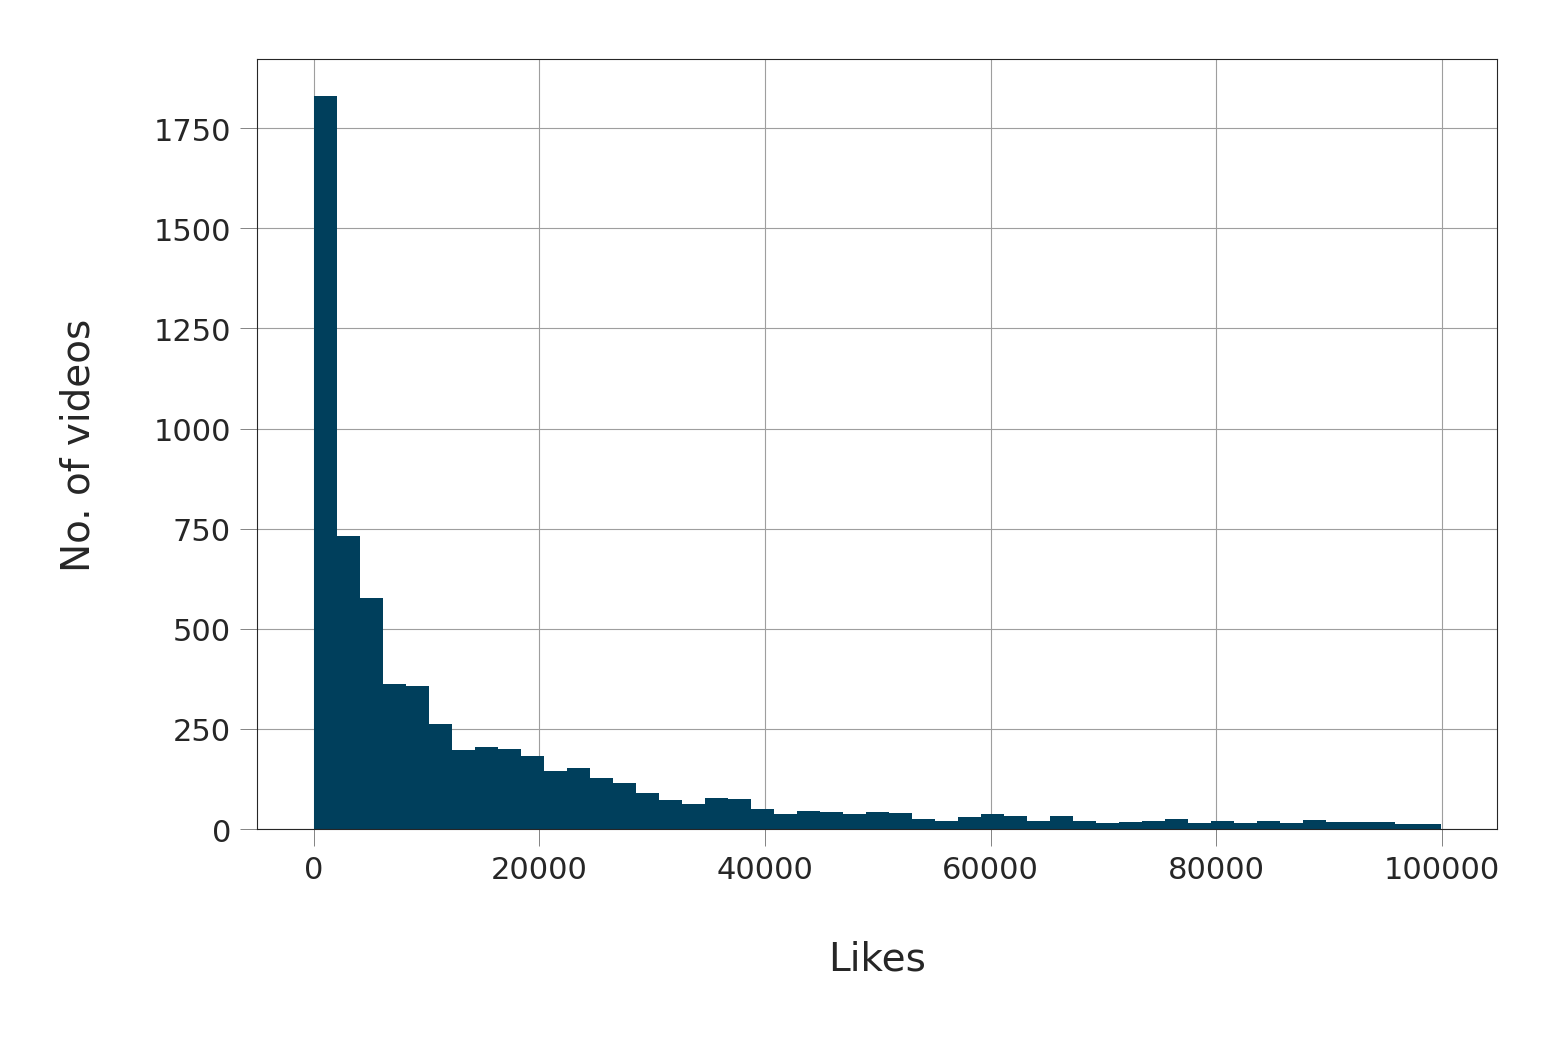

In [18]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

Now we can see that the majority of trending videos have `40000` likes or less with a peak for videos with `2000` likes or less.

Let's see the exact percentage of videos with less than `40000` likes

In [19]:
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

80.53109521188773

Similarly, we can see that the percentage of videos with less than `100,000` likes is around `80%`

### <a name="ch"></a>Comment count histogram

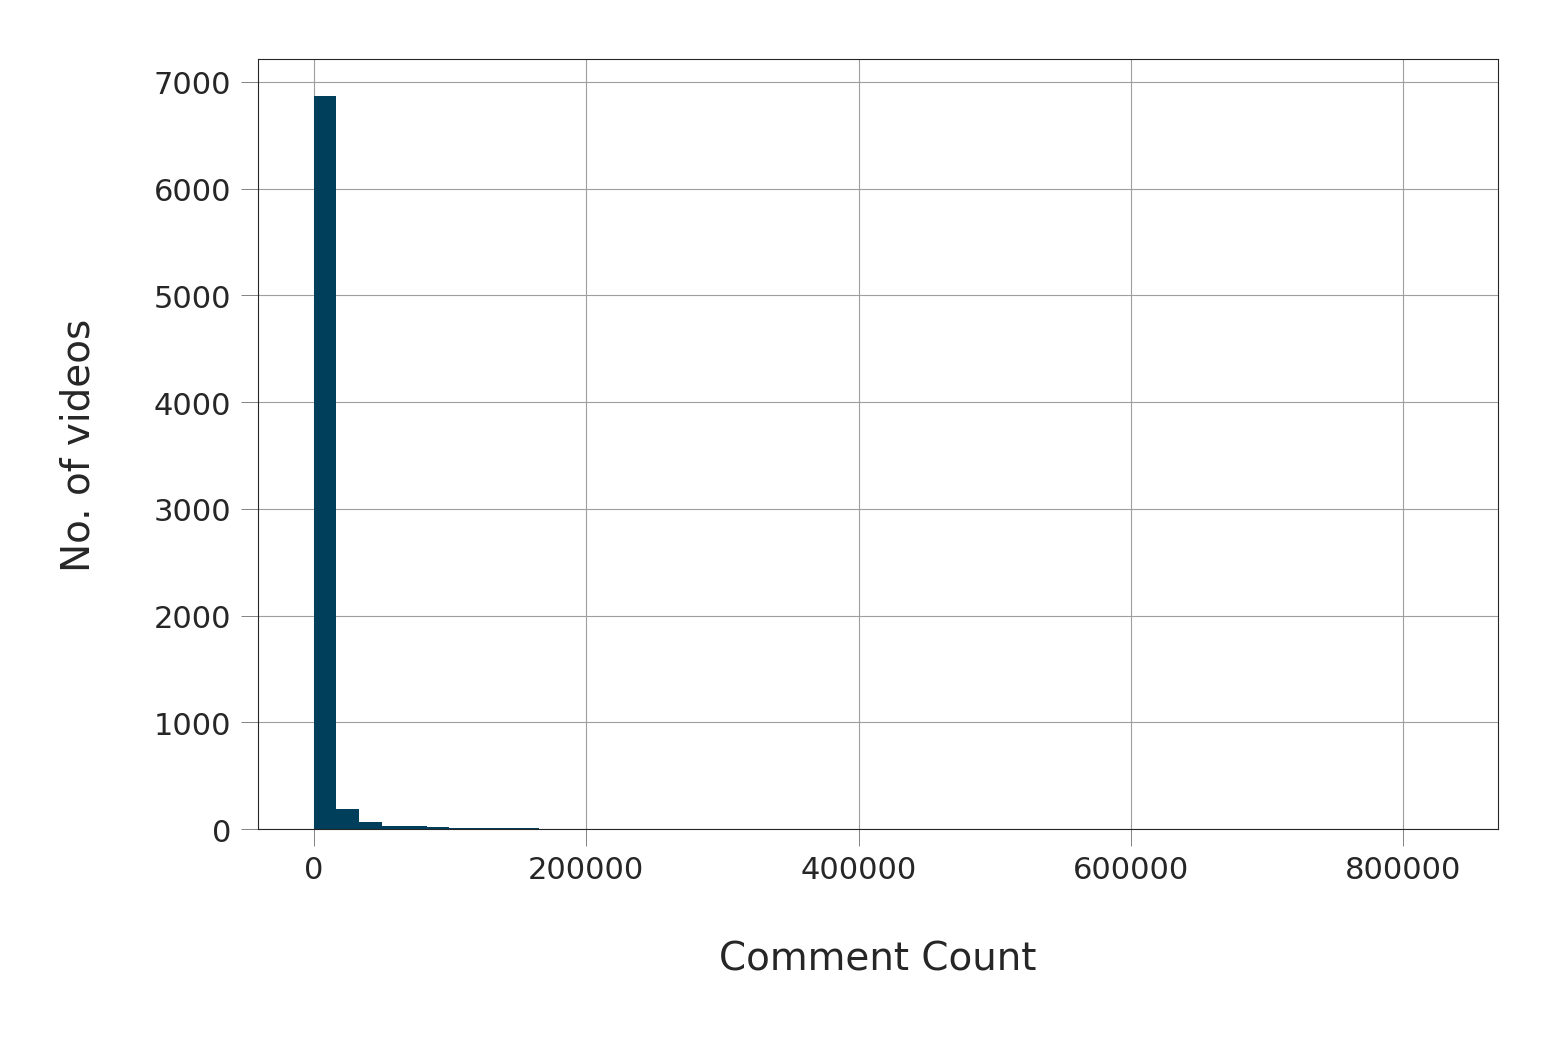

In [20]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

Let's get a closer look by eliminating entries with comment count larger than `200000` comment

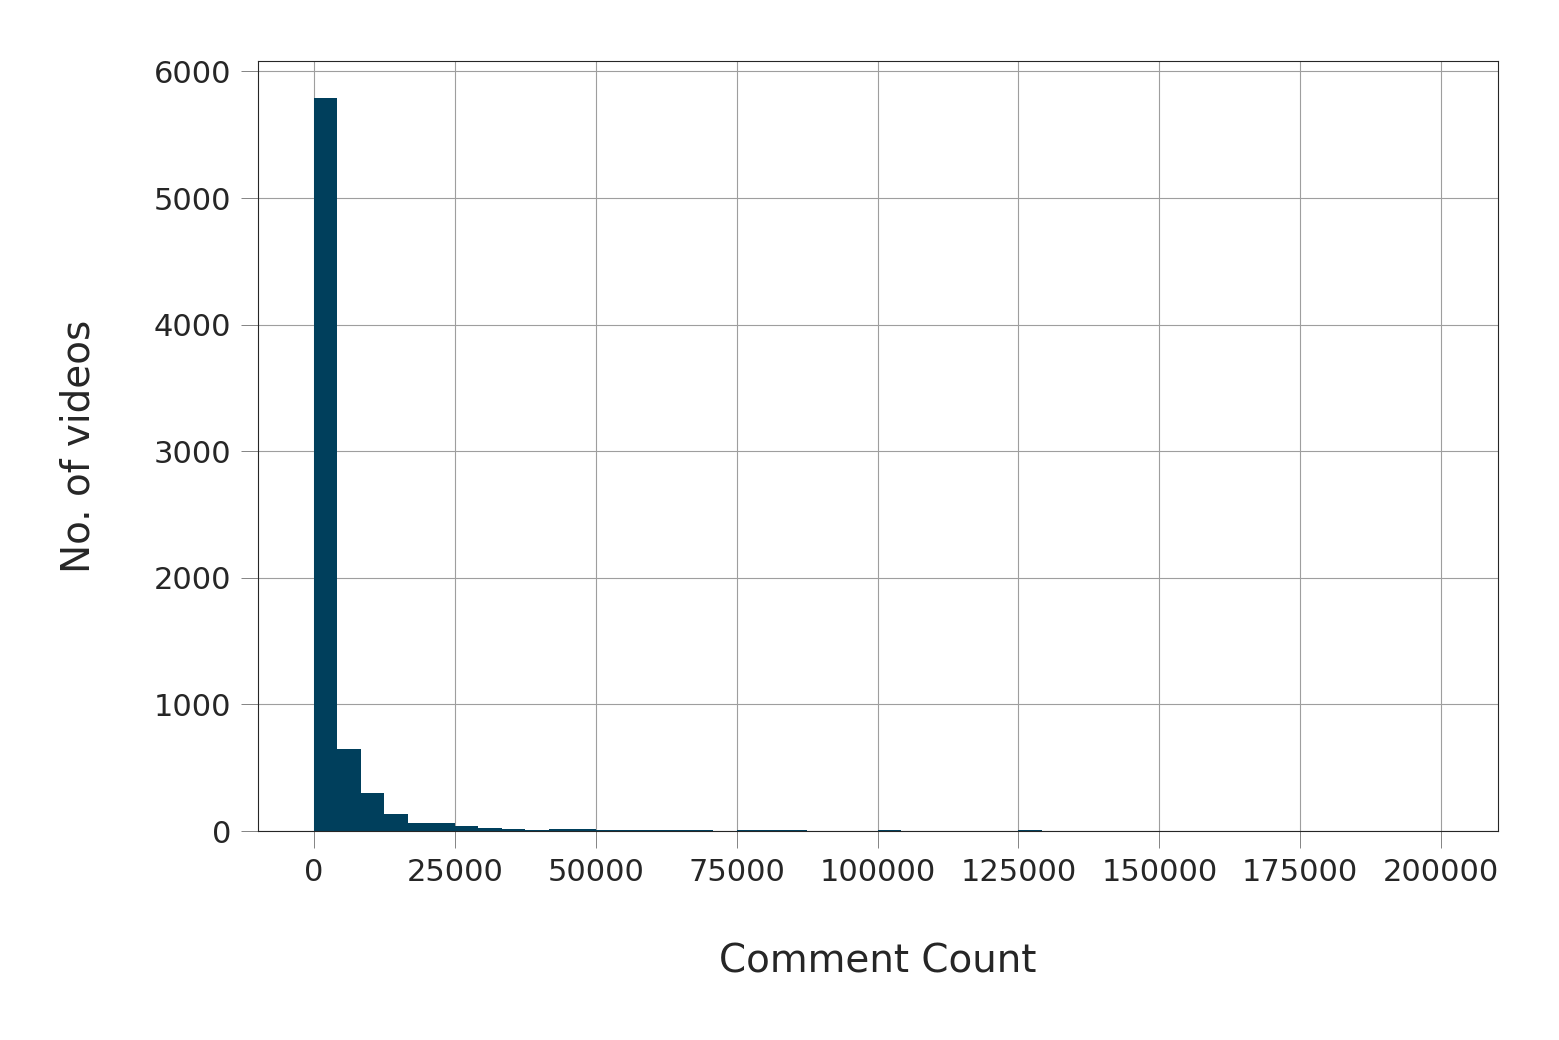

In [21]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1},
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

We see that most trending videos have around

\begin{align}
\frac{25000}{6} \approx 4166 \text{ comments}
\end{align}

since each division in the graph has six histogram bins.

As with views and likes, let's see the exact percentage of videos with less than `4000` comments

In [22]:
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

79.12768299394607

In a similar way, we can see that the percentage of videos with less than `25,000` comments  is around `79.12%`.

## <a name="descnn"></a>Description on non-numerical columns
After we described numerical columns previously, we now describe non-numerical columns

In [23]:
df.describe(include = ['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
count,7269,7269,7269,7269,7269,7269,7268,7268,7268,7268,7269
unique,1802,37,1821,955,1768,1716,1802,2,2,2,1856
top,ZJDMWVZta3M,17.14.11,Sia - Ho Ho Ho,Vox,2017-11-17T05:00:01.000Z,[none],https://i.ytimg.com/vi/ZJDMWVZta3M/default.jpg,False,False,False,
freq,10,200,10,37,20,274,10,7112,7233,7267,133


From the table above, we can see that there are `205` unique dates, which means that our dataset contains collected data about trending videos over **`205`** days.

From `video_id` description, we can see that there are `40949` videos (which is expected because our dataset contains `40949` entries), but we can see also that there are only `6351` unique videos which means that some videos appeared on the trending videos list **on more than one day**.
The table also tells us that the top frequent title is `WE MADE OUR MOM CRY...HER DREAM CAME TRUE!` and that it appeared `30` times on the trending videos list.

But there is something strange in the description table above: Because there are `6351` unique video IDs, we expect to have `6351` unique video titles also, because we assume that each ID is linked to a corresponding title. One possible interpretation is that a trending video had some title when it appeared on the trending list, then it appeared again on another day but with a modified title. Similar explaination applies for `description` column as well.
For `publish_time` column, the unique values are less than `6351`, but there is nothing strange here, because two different videos may be published at the same time.

To verify our interpretation for `title` column, let's take a look at an example where a trending video appeared more than once on the trending list but with different titles

In [24]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
6014,6FbdqwlR0H4,17.14.12,Bleach Blonde Baby (Official Video),Poppy,24,2017-12-13T14:27:16.000Z,"poppy|""youtube.com""|""music""|""blonde""|""new""|""US...",310972.00,29163.00,2001.00,4885.00,https://i.ytimg.com/vi/6FbdqwlR0H4/default.jpg,False,False,False,Order a Poppy Pack: http://maddecent.fm/poppyp...
6234,6FbdqwlR0H4,17.15.12,Poppy - Bleach Blonde Baby (Official Video),Poppy,24,2017-12-13T14:27:16.000Z,"poppy|""youtube.com""|""music""|""blonde""|""new""|""US...",530752.00,36732.00,3290.00,5852.00,https://i.ytimg.com/vi/6FbdqwlR0H4/default.jpg,False,False,False,Shop the Poppy.Computer collection: http://mad...
6464,6FbdqwlR0H4,17.16.12,Poppy - Bleach Blonde Baby (Official Video),Poppy,24,2017-12-13T14:27:16.000Z,"poppy|""youtube.com""|""music""|""blonde""|""new""|""US...",656954.00,41588.00,3739.00,6325.00,https://i.ytimg.com/vi/6FbdqwlR0H4/default.jpg,False,False,False,Shop the Poppy.Computer collection: http://mad...
6676,6FbdqwlR0H4,17.17.12,Poppy - Bleach Blonde Baby (Official Video),Poppy,24,2017-12-13T14:27:16.000Z,"poppy|""youtube.com""|""music""|""blonde""|""new""|""US...",747607.00,44663.00,3973.00,6754.00,https://i.ytimg.com/vi/6FbdqwlR0H4/default.jpg,False,False,False,Shop the Poppy.Computer collection: http://mad...
6911,6FbdqwlR0H4,17.18.12,Poppy - Bleach Blonde Baby (Official Video),Poppy,24,2017-12-13T14:27:16.000Z,"poppy|""youtube.com""|""music""|""blonde""|""new""|""US...",831331.00,47468.00,4199.00,7084.00,https://i.ytimg.com/vi/6FbdqwlR0H4/default.jpg,False,False,False,Shop the Poppy.Computer collection: http://mad...
7150,6FbdqwlR0H4,17.19.12,Poppy - Bleach Blonde Baby (Official Video),Poppy,24,2017-12-13T14:27:16.000Z,"poppy|""youtube.com""|""music""|""blonde""|""new""|""US...",906108.00,49623.00,4363.00,7689.00,https://i.ytimg.com/vi/6FbdqwlR0H4/default.jpg,False,False,False,Shop the Poppy.Computer collection: http://mad...


We can see that this video appeared on the list with two different titles.

## <a name="cap"></a>How many trending video titles contain capitalized word?
Now we want to see how many trending video titles contain at least a capitalized word (e.g. HOW). To do that, we will add a new variable (column) to the dataset whose value is `True` if the video title has at least a capitalized word in it, and `False` otherwise

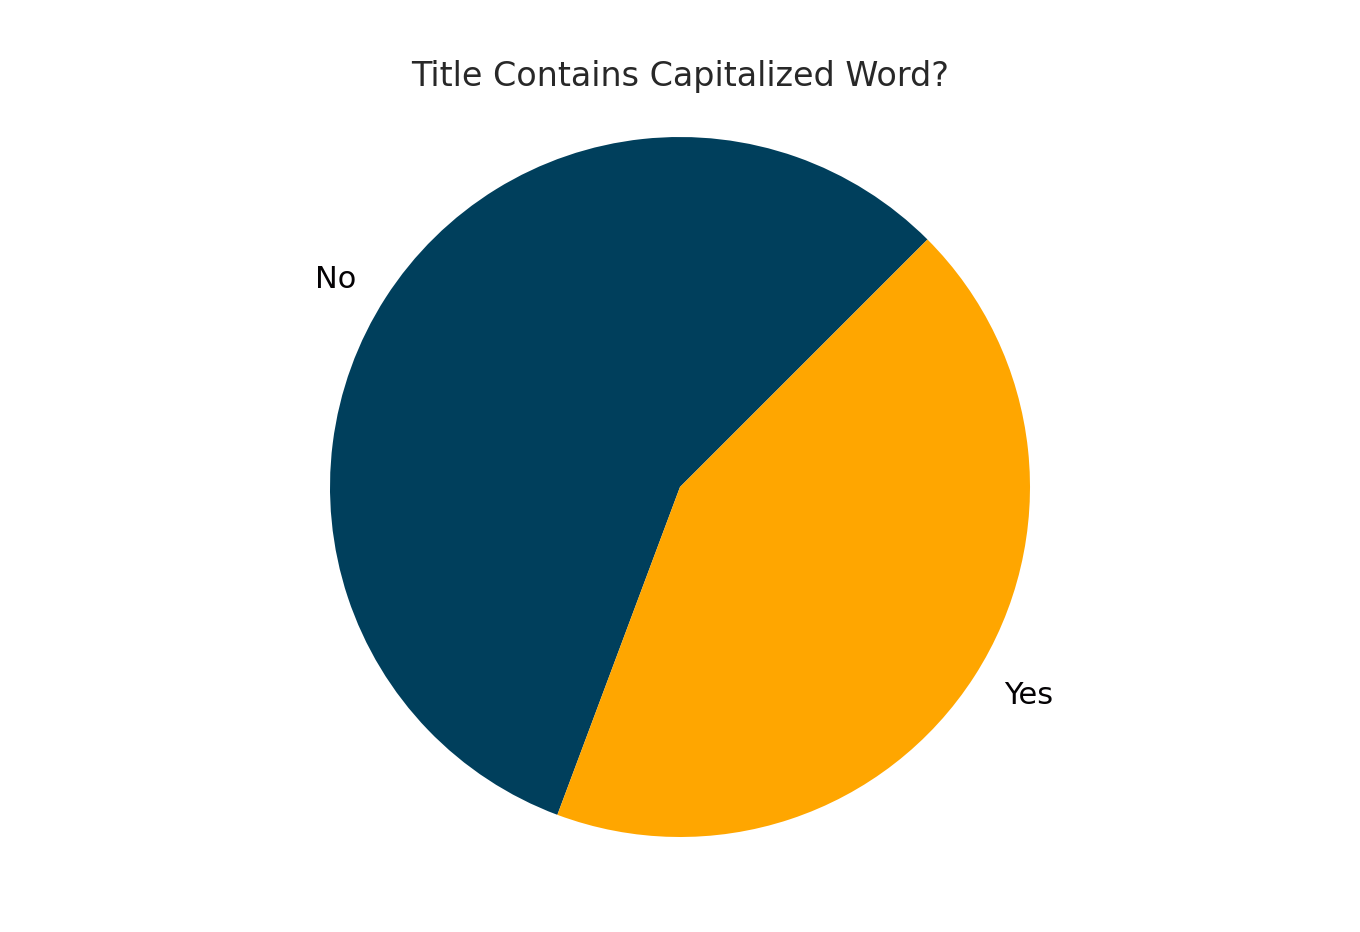

In [25]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [26]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.57
True    0.43
Name: contains_capitalized, dtype: float64

We can see that 43% of trending video titles contain at least a capitalized word. We will later use this added new column `contains_capitalized` in analyzing correlation between variables.

## <a name="len"></a>Video title lengths
Let's add another column to our dataset to represent the length of each video title, then plot the histogram of title length to get an idea about the lengths of trnding video titles

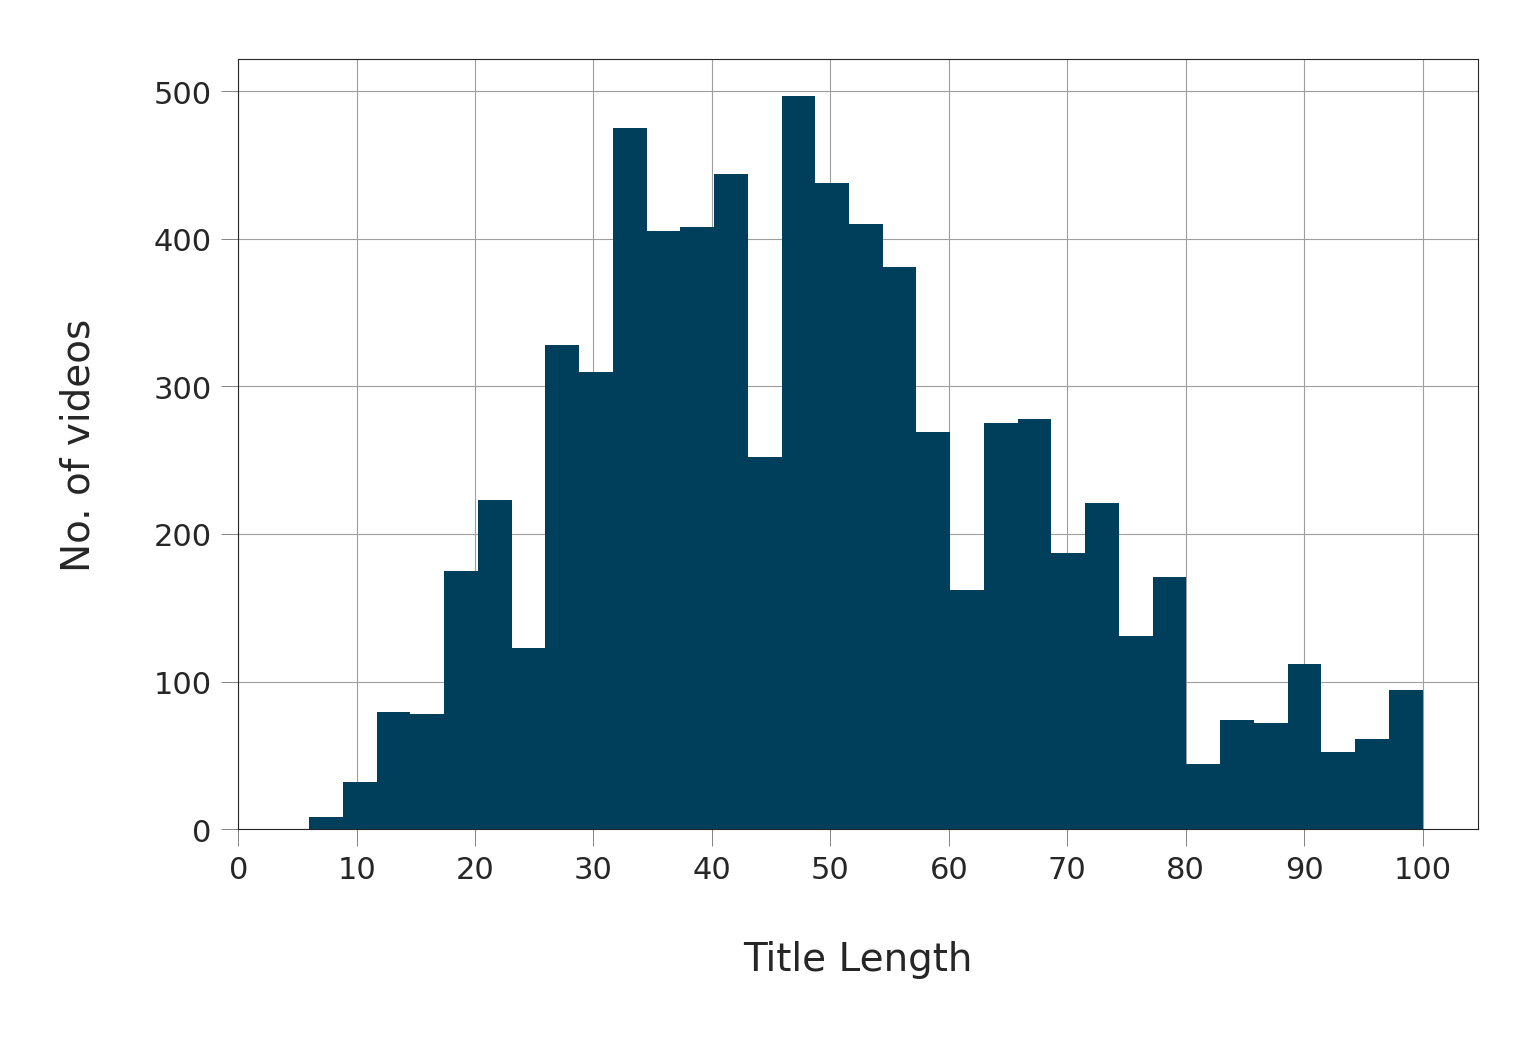

In [27]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False,
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 character approximately.

Now let's draw a [scatter plot](https://www.mathsisfun.com/data/scatter-xy-plots.html) between title length and number of views to see the relationship between these two variables

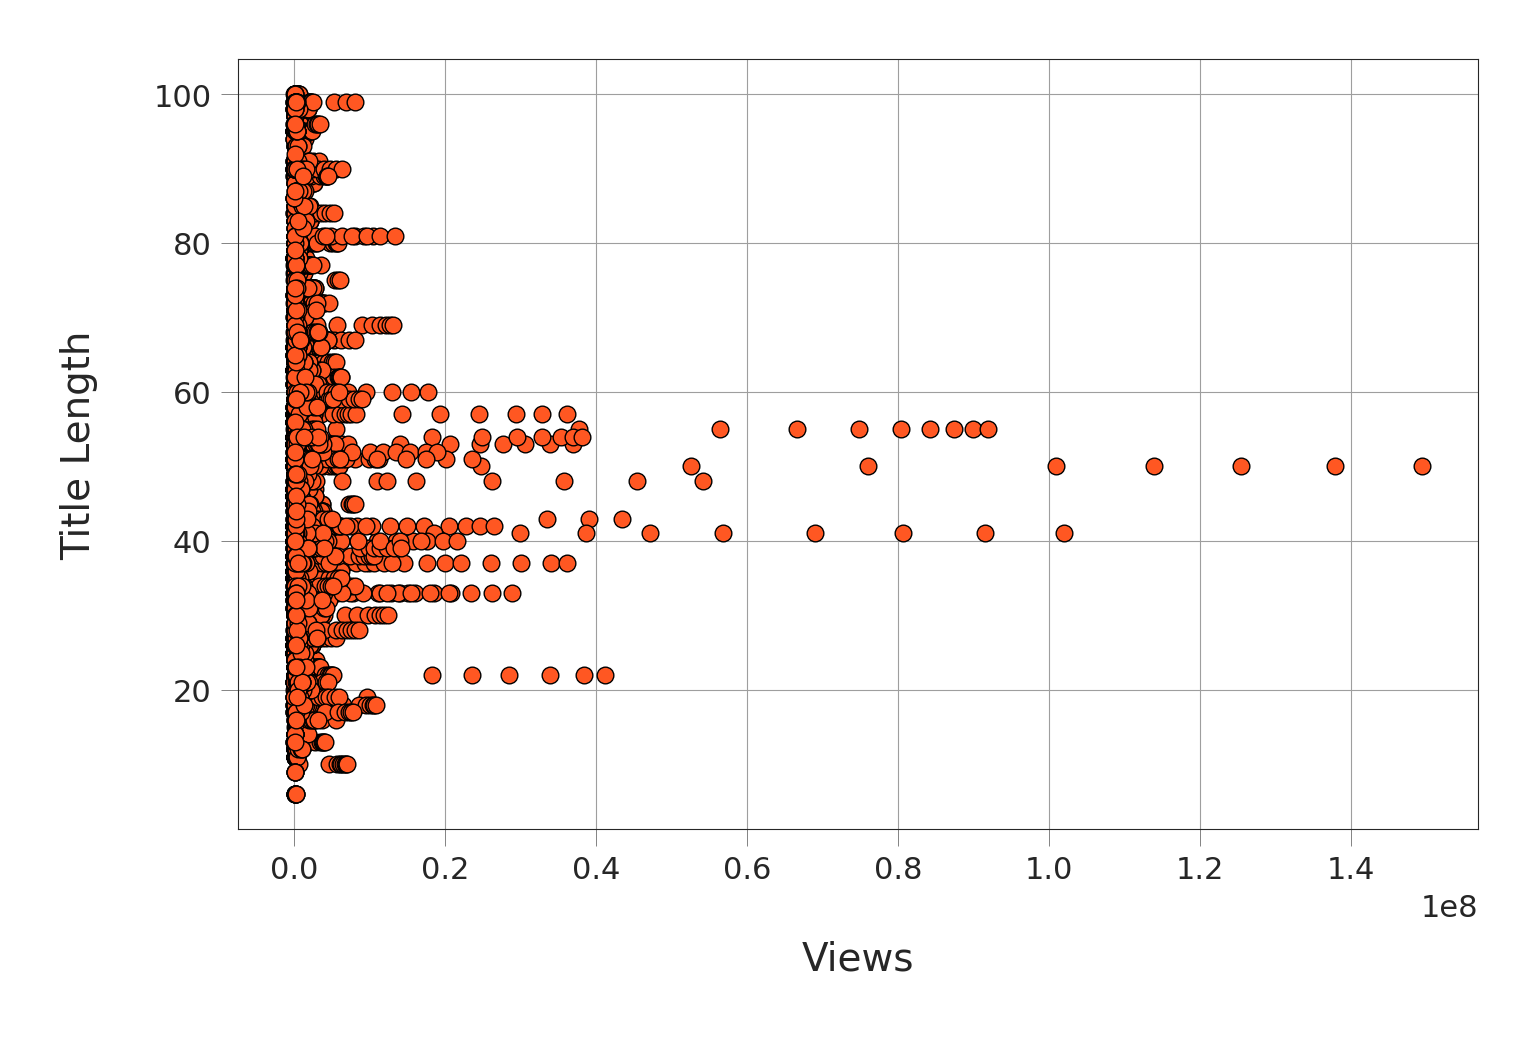

In [28]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have `100,000,000` views and more have title length between `33` and `55` characters approximately.

## <a name="corr"></a>Correlation between dataset variables
Now let's see how the dataset variables are [correlated](https://www.mathsisfun.com/data/correlation.html) with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?
​
Correlation is represented as a value between `-1` and `+1` where `+1` denotes the highest positive correlation, `-1` denotes the highest negative correlation, and `0` denotes that there is no correlation.
​
Let's see the correlation table between our dataset variables (numerical and boolean variables only)

In [29]:
df.corr()

,category_id,views,likes,dislikes,comment_count,contains_capitalized,title_length
category_id,1.00,-0.07,-0.09,0.01,-0.03,0.02,-0.00
views,-0.07,1.00,0.89,0.68,0.79,-0.03,-0.02
likes,-0.09,0.89,1.00,0.53,0.86,-0.01,-0.04
dislikes,0.01,0.68,0.53,1.00,0.76,-0.02,-0.01
comment_count,-0.03,0.79,0.86,0.76,1.00,0.02,-0.04
contains_capitalized,0.02,-0.03,-0.01,-0.02,0.02,1.00,0.13
title_length,-0.00,-0.02,-0.04,-0.01,-0.04,0.13,1.00


We see for example that views and likes are highly positively correlated with a correlation value of `0.85`; we see also a high positive correlation (`0.80`) between likes and comment count, and between dislikes and comment count (`0.70`).

There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

Now let's visualize the correlation table above using a [heatmap](https://www.wikiwand.com/en/Heat_map)

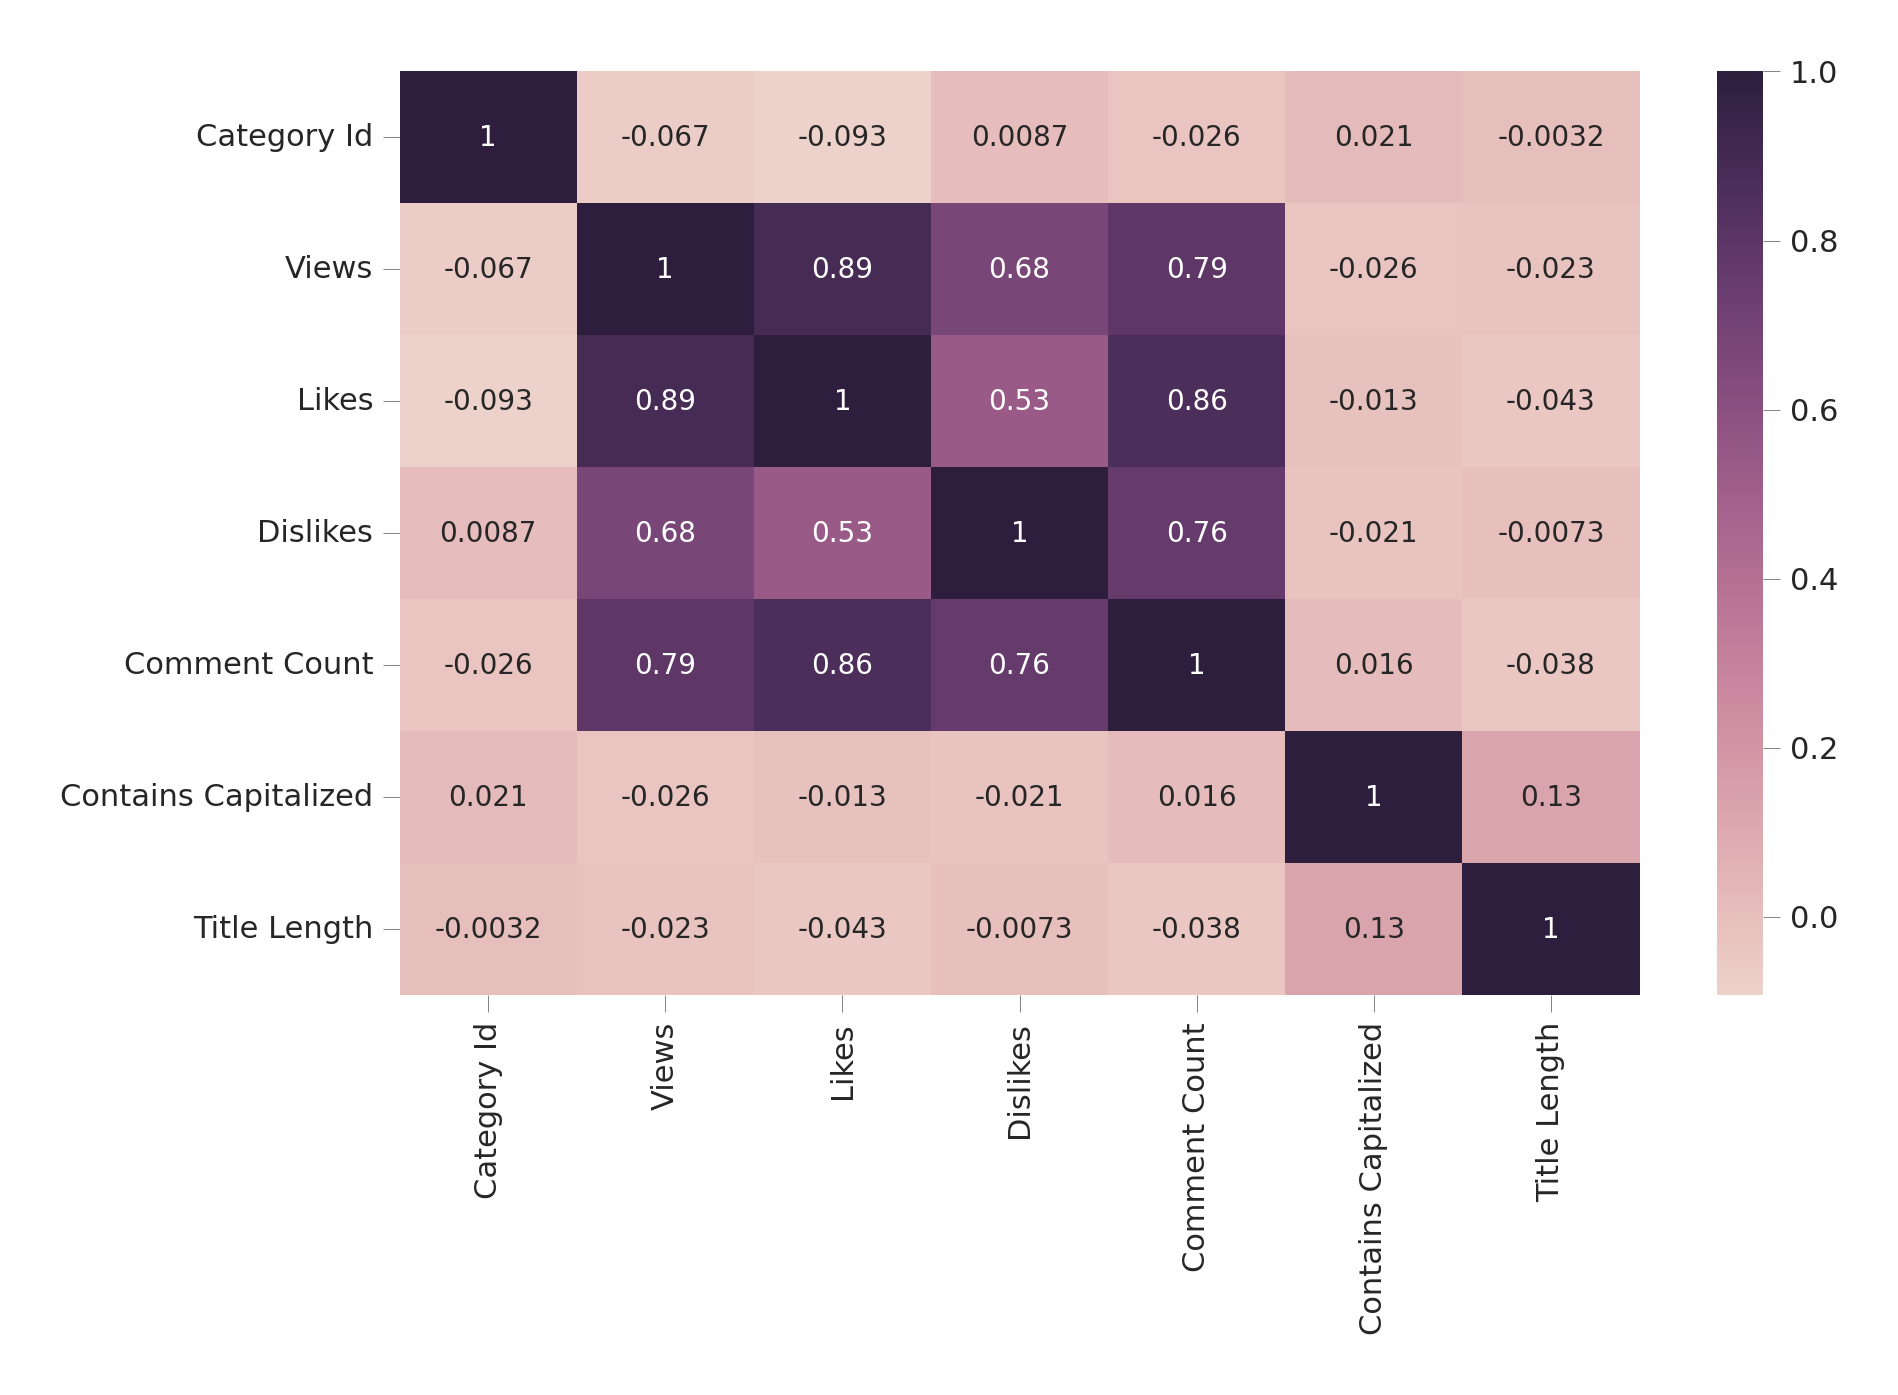

In [30]:
h_labels = [x.replace('_', ' ').title() for x in
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

The correlation map and correlation table above say that views and likes are highly positively correlated. Let's verify that by plotting a scatter plot between views and likes to visualize the relationship between these variables

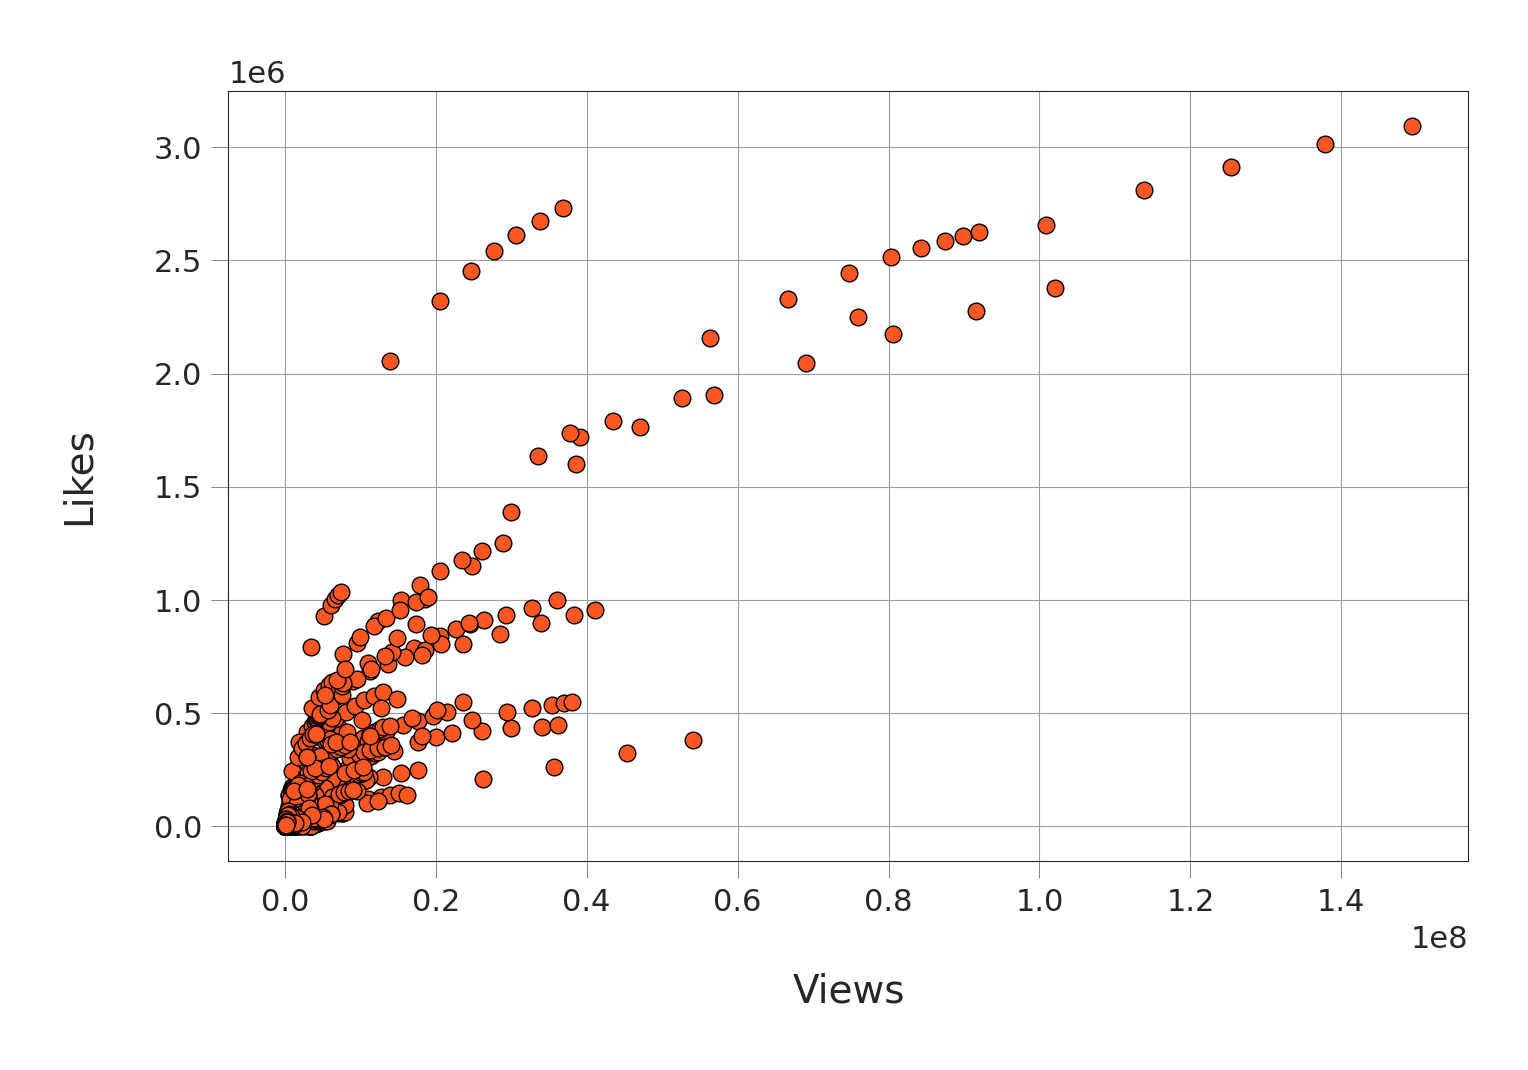

In [31]:
fig, ax = plt.subplots()
_ = plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Likes")

We see that views and likes are truly positively correlated: as one increases, the other increases too—mostly.

Another verification of the correlation matrix and map is the scatter plot we drew above between views and title length as it shows that there is no correlation between them.

## <a name="commti"></a>Most common words in video titles
Let's see if there are some words that are used significantly in trending video titles. We will display the `25` most common words in all trending video titles

In [32]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('-', 2107),
 ('|', 1800),
 ('The', 1247),
 ('the', 712),
 ('to', 480),
 ('of', 462),
 ('a', 452),
 ('&', 409),
 ('2017', 393),
 ('A', 392),
 ('in', 359),
 ('with', 344),
 ('and', 325),
 ('How', 316),
 ('on', 310),
 ('Video)', 273),
 ('Trailer', 270),
 ('I', 264),
 ('You', 228),
 ('(Official', 225),
 ('To', 224),
 ('for', 222),
 ('Music', 219),
 ('Official', 201),
 ('In', 174)]

Ignoring words like "the" and "of", we can see that "-" and "|" symbols occured a lot in the `40949` trending video titles: `2,107` times and `10663` times respectively. We notice also that words "Video", "Trailer", "How", and "2018" are common in trending video titles; each occured in 1613-1901 video titles.

Let's draw a word cloud for the titles of our trending videos, which is a way to visualize most common words in the titles; the more common the word is, the bigger its font size is

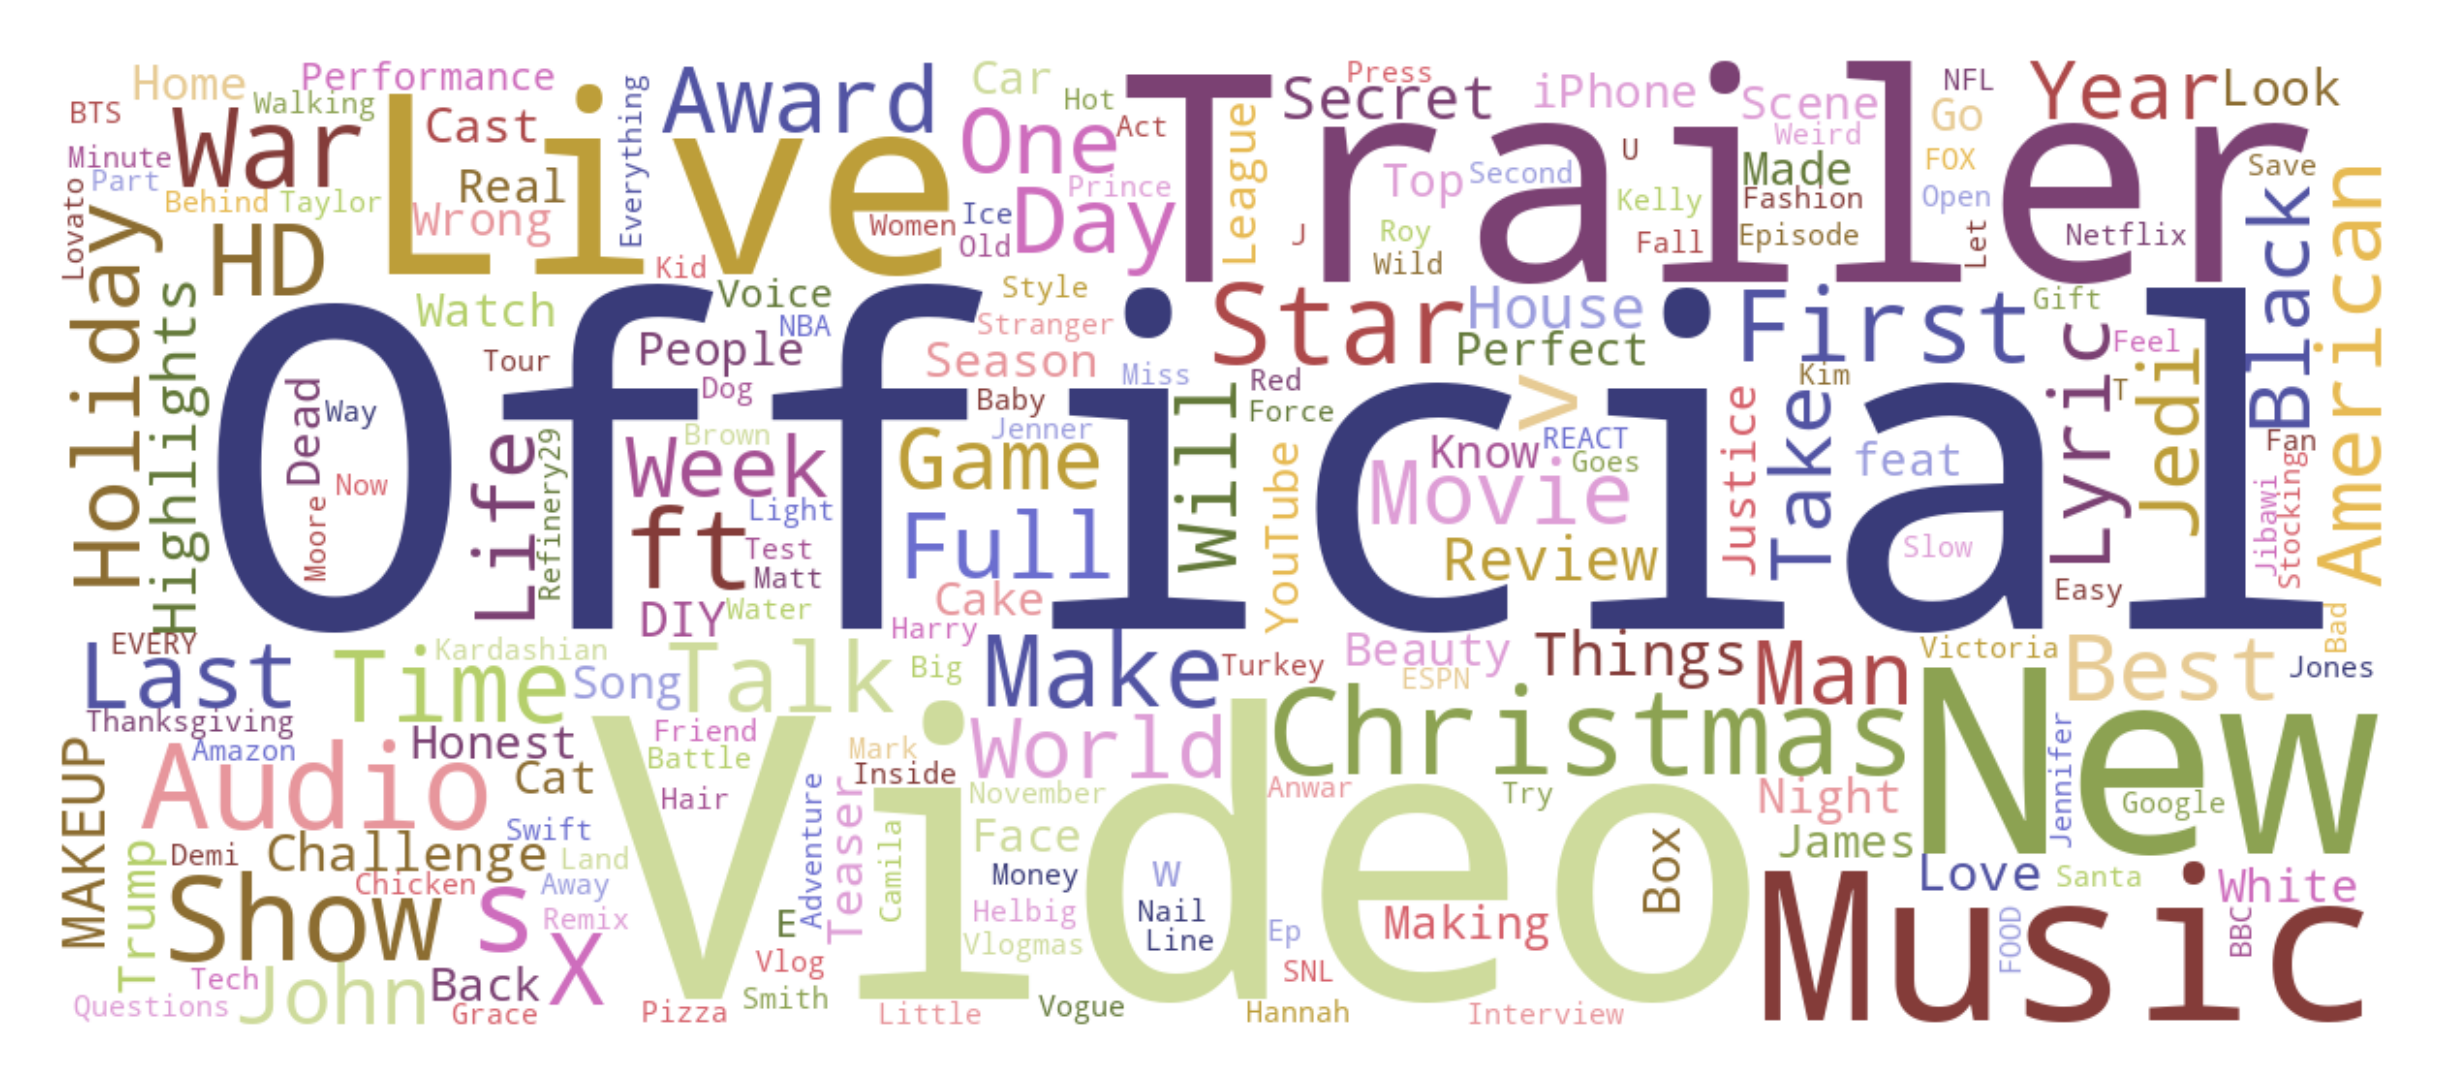

In [33]:
# wc = wordcloud.WordCloud(width=1200, height=600, collocations=False, stopwords=None, background_color="white", colormap="tab20b").generate_from_frequencies(dict(Counter(title_words).most_common(150)))
wc = wordcloud.WordCloud(width=1200, height=500,
                         collocations=False, background_color="white",
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## <a name="chan"></a>Which channels have the largest number of trending videos?

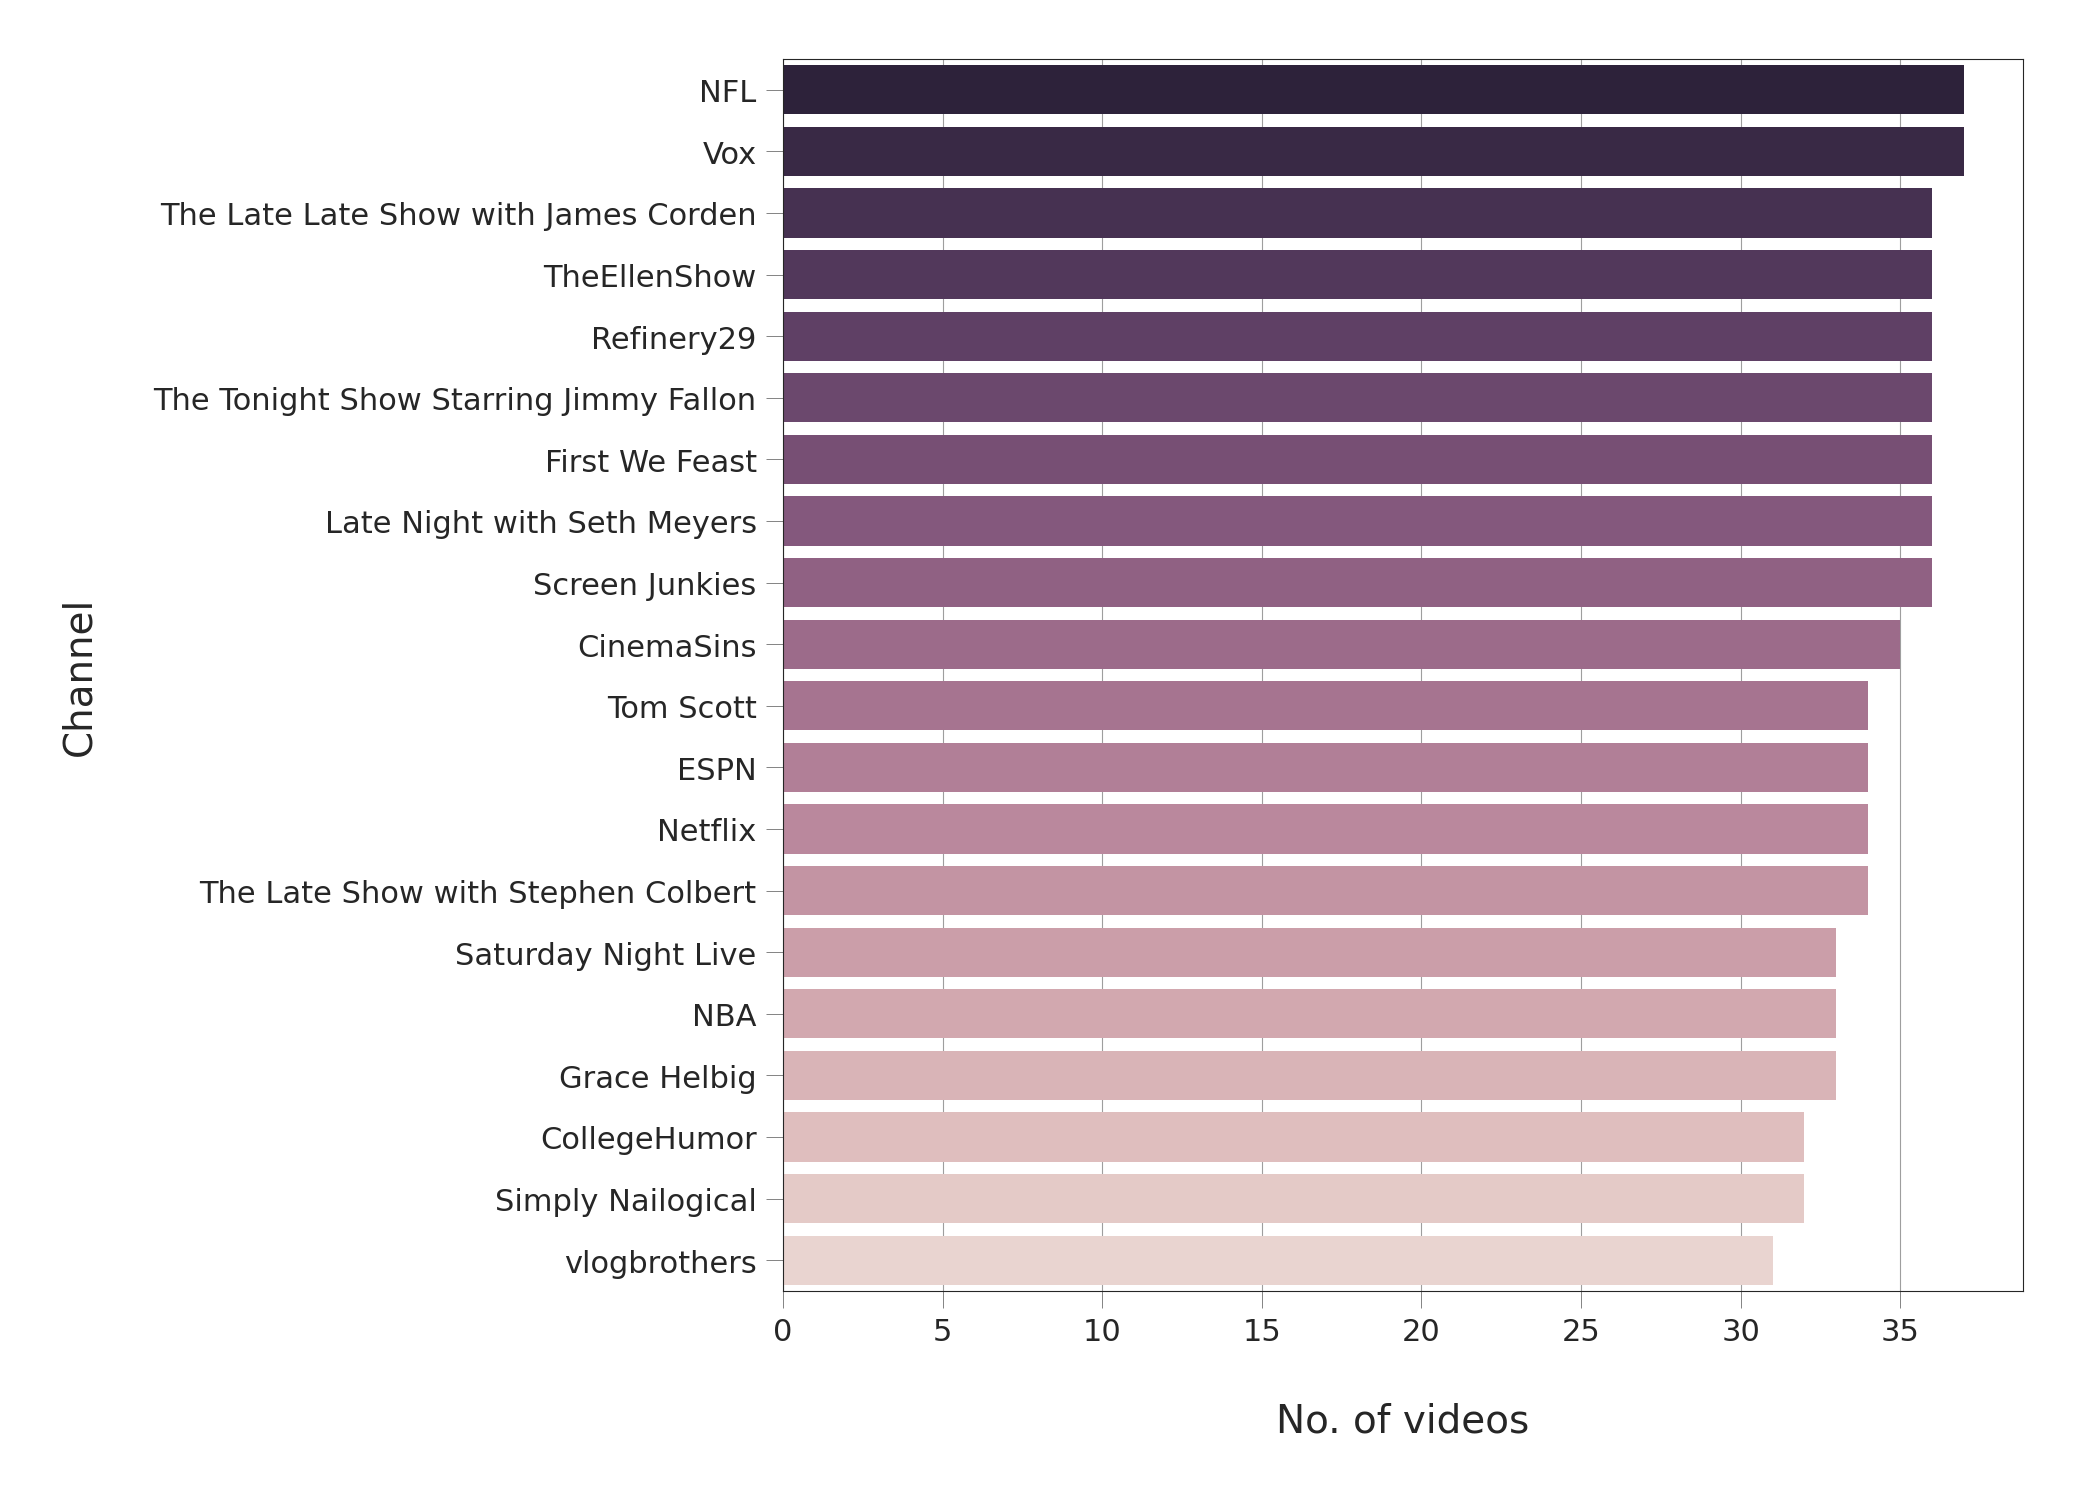

In [34]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

## <a name="cat"></a>Which video category has the largest number of trending videos?
First, we will add a column that contains category names based on the values in `category_id` column. We will use a category JSON file provided with the dataset which contains information about each category.

In [36]:
with open("/content/US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

Now we can see which category had the largest number of trending videos

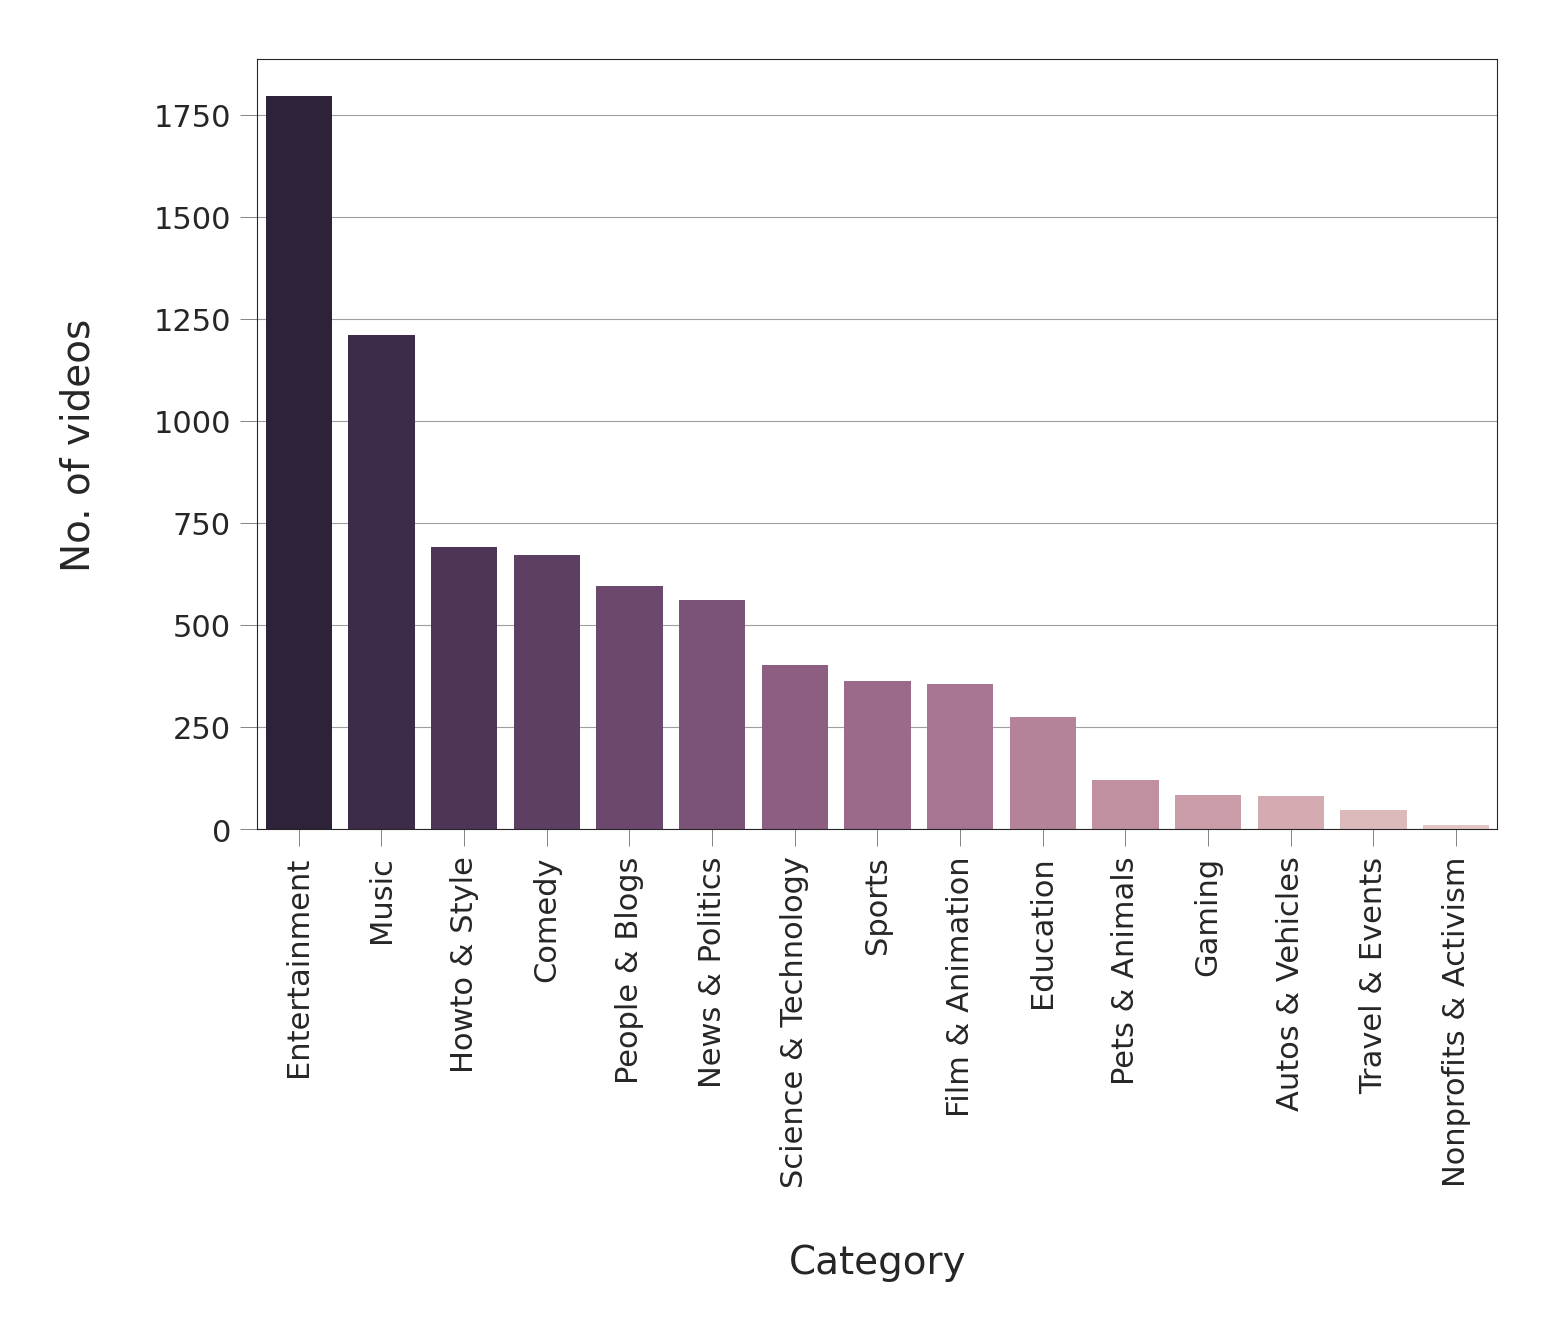

In [37]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf,
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

We see that the Entertainment category contains the largest number of trending videos among other categories: around `1,750+` videos, followed by Music category with around `1,250` videos, followed by Howto & Style category with around `750` videos, and so on.

## <a name="pub"></a>Trending videos and their publishing time
An example value of the `publish_time` column in our dataset is `2017-11-13T17:13:01.000Z`. And according to information on this page: https://www.w3.org/TR/NOTE-datetime, this means that the date of publishing the video is `2017-11-13` and the time is `17:13:01` in Coordinated Universal Time (UTC) time zone.
​
Let's add two columns to represent the date and hour of publishing each video, then delete the original `publish_time` column because we will not need it anymore

In [38]:
df["publishing_day"] = df["publish_time"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
df["publishing_hour"] = df["publish_time"].apply(lambda x: x[11:13])
df.drop(labels='publish_time', axis=1, inplace=True)

Now we can see which days of the week had the largest numbers of trending videos

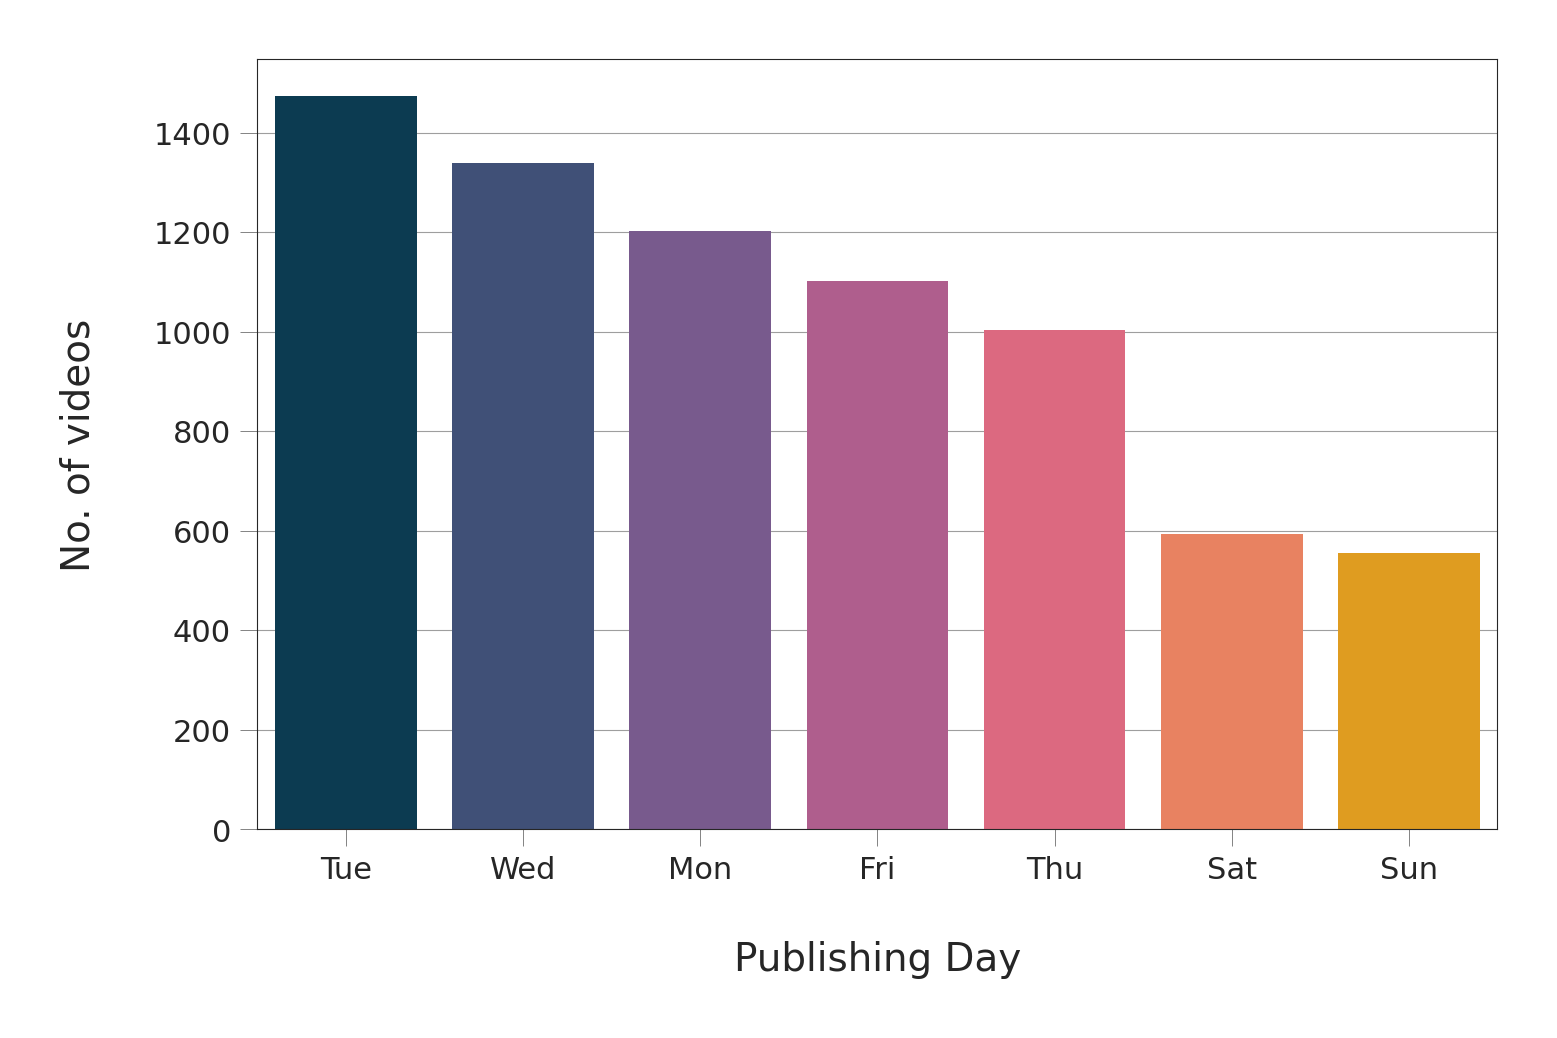

In [39]:
cdf = df["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf,
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195',
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

We can see that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.

Now let's use `publishing_hour` column to see which publishing hours had the largest number of trending videos

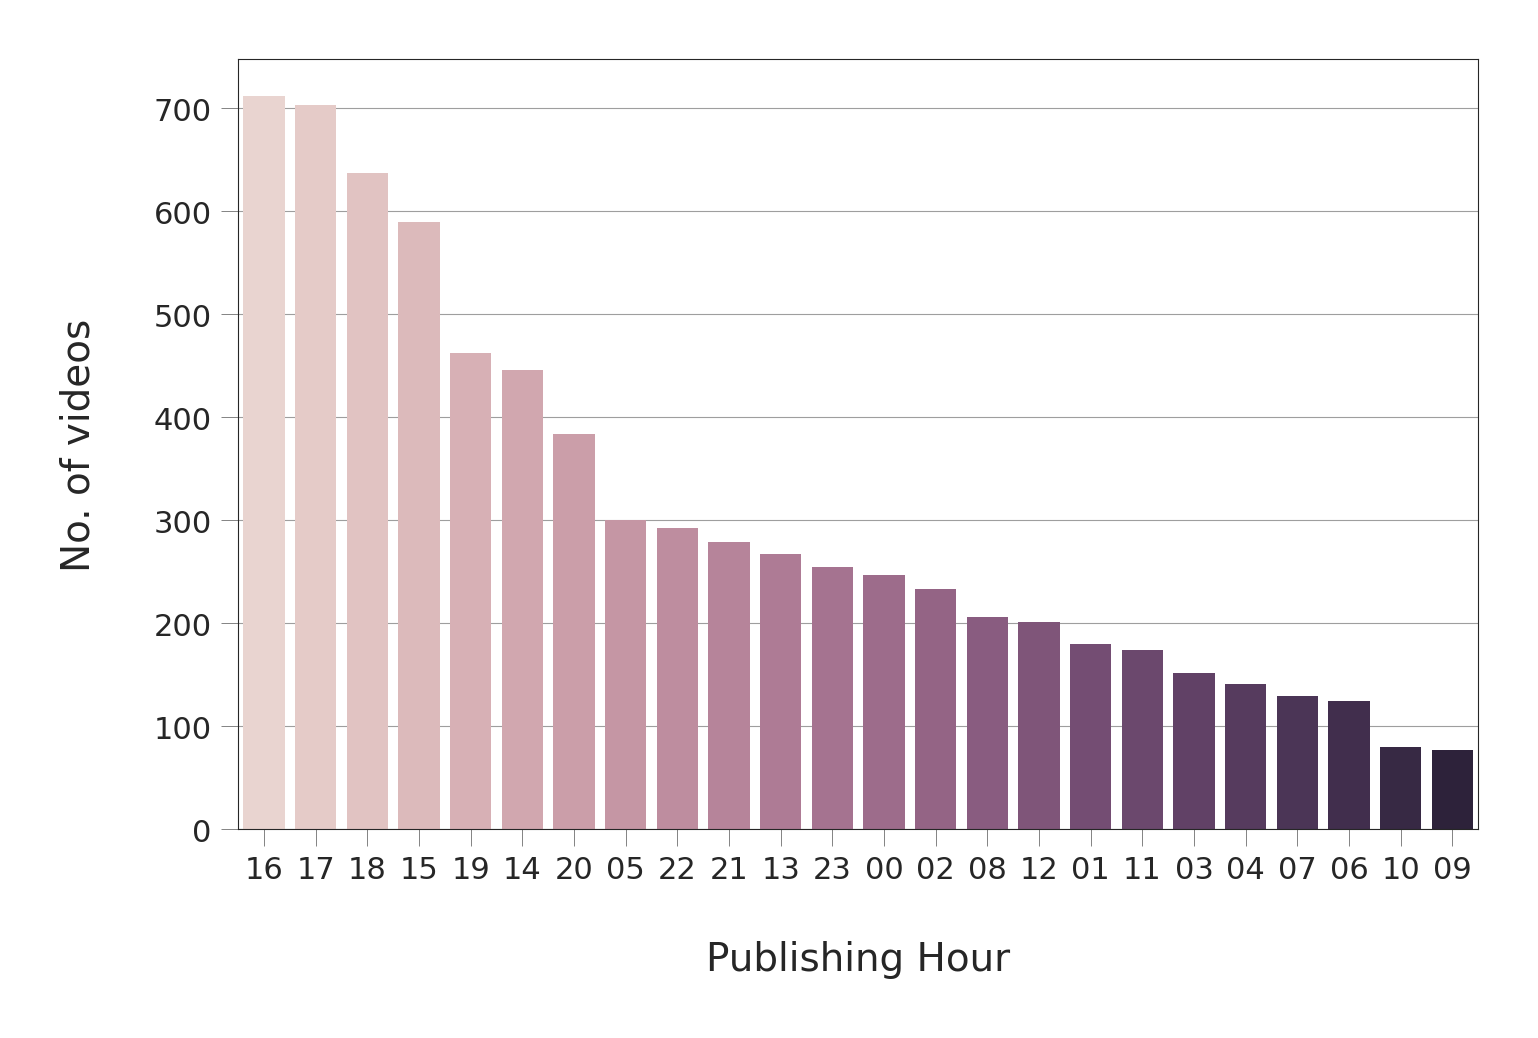

In [40]:
cdf = df["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf,
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

We can see that the period between 2PM and 7PM, peaking between 4PM and 5PM, had the largest number of trending videos. We notice also that the period between 12AM and 1PM has the smallest number of trending videos. But why is that? Is it because people publish a lot more videos between 2PM and 7PM? Is it because how YouTube algorithm chooses trending videos?

## <a name="err"></a>How many trending videos have an error?
To see how many trending videos got removed or had some error, we can use `video_error_or_removed` column in the dataset

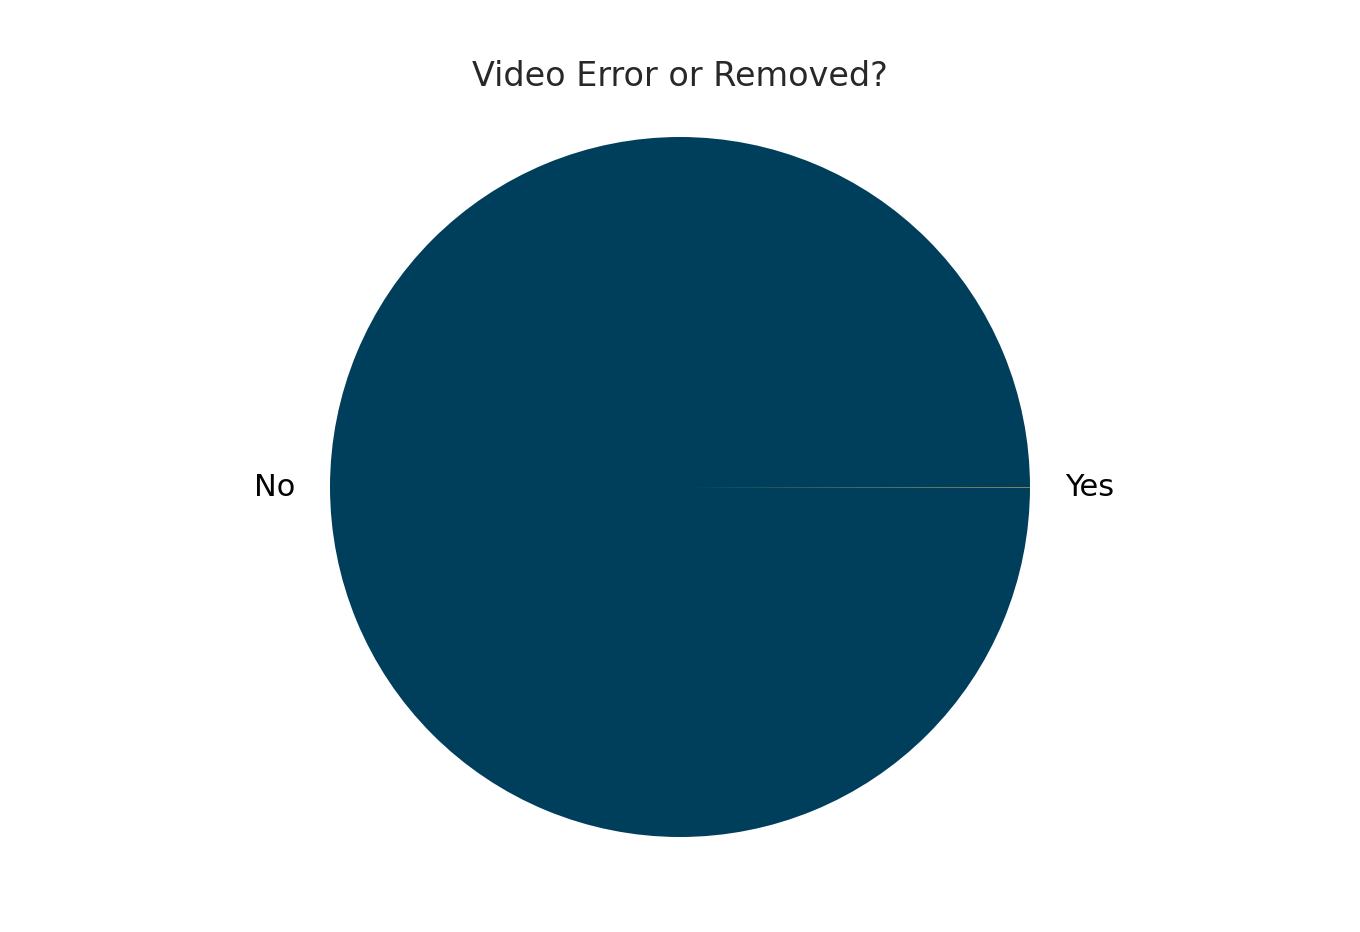

In [41]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Video Error or Removed?')

In [42]:
df["video_error_or_removed"].value_counts()

False    7267
True        1
Name: video_error_or_removed, dtype: int64

We can see that out of videos that appeared on trending list (`7268` videos), there is a tiny portion (`1` video) with errors.

## <a name="commdis"></a>How many trending videos have their commets disabled?
To know that, we use `comments_disabled` column

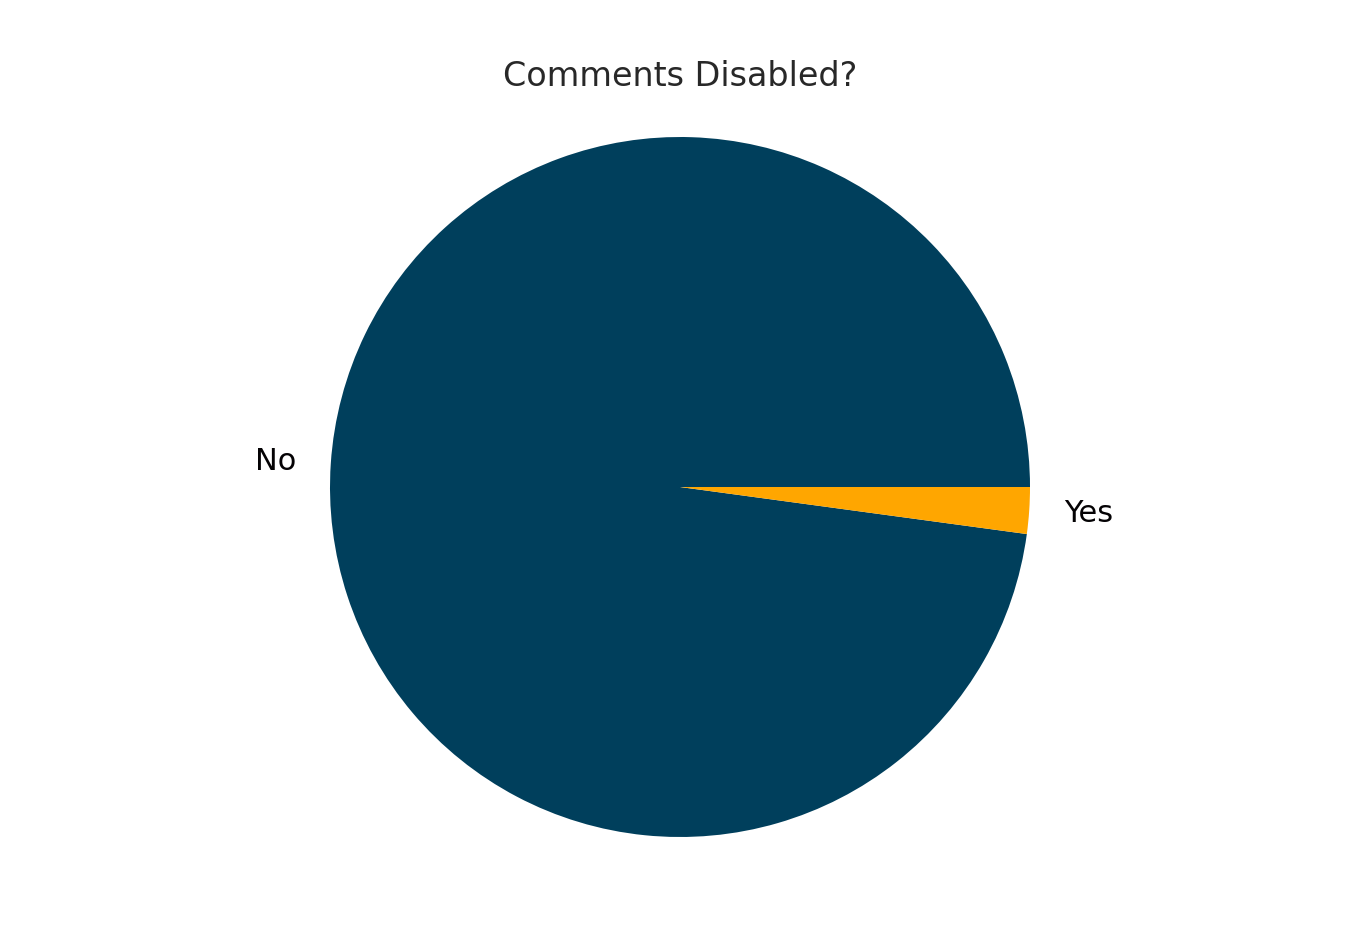

In [43]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Comments Disabled?')

In [44]:
df["comments_disabled"].value_counts(normalize=True)

False   0.98
True    0.02
Name: comments_disabled, dtype: float64

We see that only `2%` of trending videos prevented users from commenting.

## <a name="ratdis"></a>How many trending videos have their ratings disabled?
To know that, we use `ratings_disabled` column

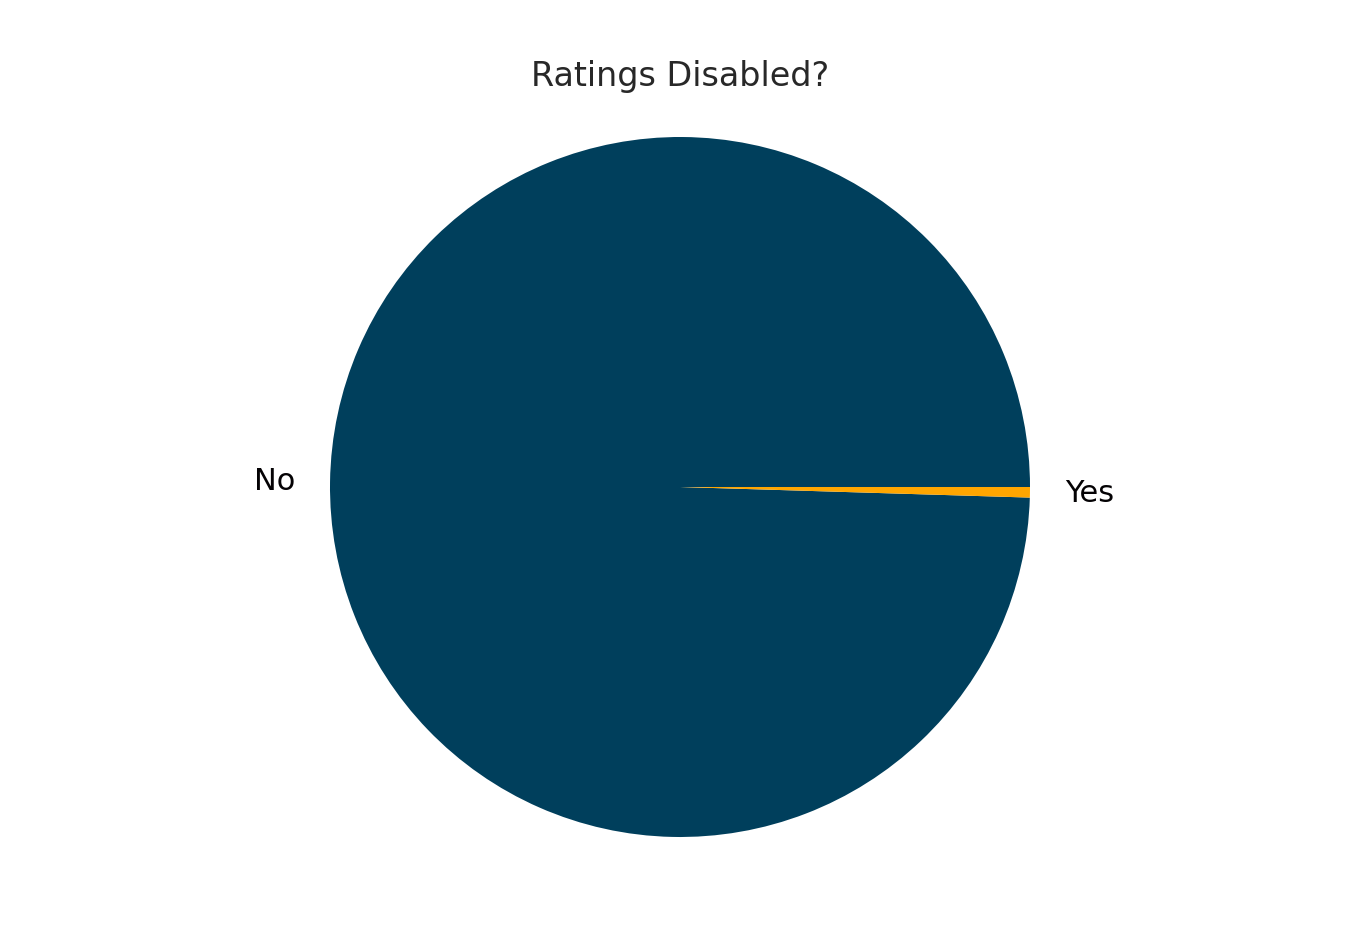

In [45]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
            colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Ratings Disabled?')

In [46]:
df["ratings_disabled"].value_counts()

False    7233
True       35
Name: ratings_disabled, dtype: int64

We see that only `35` trending videos out of `7,268` prevented users from commenting.




## <a name="commratdis"></a>How many videos have both comments and ratings disabled?

In [47]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

30

So there are just `30` trending videos that have both comments and ratings disabled








# Conclusion

In conclusion, our analysis of the YouTube trending videos dataset spanning 205 days from 2017 to 2018 has revealed several noteworthy insights and trends:

**Temporal Trends:** The dataset predominantly consists of videos from 2017, with only a minority from 2018, indicating that most videos trended in the earlier year.

**Views and Engagement:** While the average number of views for trending videos is approximately 1.35 million, the distribution is highly skewed, with a median value of around 301,432 views. Similarly, the average number of likes is about 49,057, while the average number of dislikes is approximately 3,211. The average comment count stands at 6,243, with a median of around 295.5 comments.

**View Distribution:** A significant majority of trending videos have views below 5 million, with about 76.05% having less than 1 million views. This trend continues with 71% having fewer than 1.5 million views and 91% having less than 5 million views.

**Likes and Comments:** Most trending videos have less than 40,000 likes, and the majority have less than 4,000 comments. Only a small portion of videos exceed 100,000,000 views, and they tend to have title lengths between 33 and 55 characters.

**Title Analysis:** Special characters like '-' and '|' are common in titles, and words such as 'Official,' 'Video,' 'Trailer,' 'How,' and '2018' frequently appear. Furthermore, about 43% of titles contain at least one capitalized word.

**Correlations:** Strong positive correlations exist between views and likes, likes and comment count, and dislikes and comment count. Some positive correlations are also observed between views and dislikes and between views and comment count.

**Categories:** The 'Entertainment' category leads with the most trending videos, followed by 'Music' and 'Howto & Style.'

**Day and Time Trends:** There is a notable dip in the number of trending videos on Sundays and Saturdays. Additionally, the period between 2 PM and 7 PM, particularly peaking from 4 PM to 5 PM, sees the highest number of trending videos.

**Data Quality:** While most of the dataset is clean, some videos appear on the trending list multiple times with varying titles. Additionally, a small portion of videos exhibit errors, and only a few disable comments or ratings.

**Unique Dates:** The dataset covers 205 unique dates, reflecting the diversity of trending videos over time.

In summary, this analysis provides valuable insights into the dynamics of YouTube trending videos, including viewership trends, engagement patterns, title characteristics, and category distributions. These findings can inform content creators, marketers, and analysts seeking to understand and optimize their presence on the platform.